<a href="https://colab.research.google.com/github/Jassie22/BSc-Chem-project/blob/main/methanol_flash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A notebook to flesh out the calculations of the methanol flash photolysis**


In [54]:
#imports
from google.colab import drive
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

import folder from drive:

In [2]:
try:
  drive.mount('/content/drive')
except Exception as e:
    print("Error mounting Drive:", e)
  #set path
folder_path = '/content/drive/MyDrive/Methanol'

#removes unwanted files
def filter_filename(filename):
    parts = filename.split(" ")
    number_part = parts[-1]
    return number_part.isdigit() and "sad" not in filename and "pointy" not in filename
# Count original files
original_file_count = len(os.listdir(folder_path))
# filter filenames using the function
filtered_filenames = [filename for filename in os.listdir(folder_path) if filter_filename(filename)]


Mounted at /content/drive


Make DataFrame from each file:

In [3]:
# Create a dictionary to store the DataFrames
dfs = {}

# Iterate through the filtered filenames
for filename in filtered_filenames:
  file_path = os.path.join(folder_path, filename)  # Construct full file path
  try:
    df = pd.read_csv(file_path,delimiter='\t')  # Read the file into a DataFrame
    dfs[filename] = df  # Store the DataFrame in the dictionary with the filename as key
  except Exception as e:
    print(f"Error reading file {filename}: {e}")

print(f"Created {len(dfs)} DataFrames from filtered files.")

# Access DataFrames using their filenames:
for filename, df in dfs.items():
  print(f"DataFrame for file '{filename}':")
  print(df.head())  # Print the first few rows of each DataFrame

Created 29 DataFrames from filtered files.
DataFrame for file 'Methanol 23 C, 200 us flash, 2 s duration, 1':
   -0.200  3.693
0  -0.198  3.692
1  -0.196  3.694
2  -0.194  3.693
3  -0.192  3.675
4  -0.190  3.693
DataFrame for file 'Methanol 23 C, 200 us flash, 2 s duration, 2':
   -0.200  3.575
0  -0.198  3.573
1  -0.196  3.575
2  -0.194  3.576
3  -0.192  3.573
4  -0.190  3.578
DataFrame for file 'Methanol 23 C, 200 us flash, 2 s duration, 3':
   -0.200  3.712
0  -0.198  3.711
1  -0.196  3.705
2  -0.194  3.705
3  -0.192  3.709
4  -0.190  3.708
DataFrame for file 'Methanol 23 C, 200 us flash, 2 s duration, 5':
   -0.200  3.742
0  -0.198  3.740
1  -0.196  3.744
2  -0.194  3.739
3  -0.192  3.743
4  -0.190  3.740
DataFrame for file 'Methanol 23 C, 200 us flash, 2 s duration, 4':
   -0.200  3.705
0  -0.198  3.706
1  -0.196  3.709
2  -0.194  3.708
3  -0.192  3.707
4  -0.190  3.708
DataFrame for file 'Methanol 33 C, 200 us flash, 2 s duration, 2':
   -0.200  3.717
0  -0.198  3.714
1  -0.196  

In [4]:
# Create an empty DataFrame to store all data
info = pd.DataFrame(columns=["Solvent", "Temperature (C)", "Flash Rate (us)", "Duration (s)", "Experiment Number"])

# Iterate through filtered filenames
for filename in filtered_filenames:
    # Split filename on spaces, handling potential trailing spaces
    parts = filename.strip().split()

    # Extract information from specific parts
    solvent = parts[0]
    temperature = int(parts[1].split("C")[0])
    flash_rate = int(parts[3].split("us")[0])
    duration = float(parts[-4].split("s")[0])
    exp_num = int(parts[-1])

    data = {
        "Solvent": solvent,
        "Temperature (C)": temperature,
        "Flash Rate (us)": flash_rate,
        "Duration (s)": duration,
        "Experiment Number": exp_num
    }

    info = info.append(data, ignore_index=True)  # Add a new row to the DataFrame

print(info)


     Solvent Temperature (C) Flash Rate (us)  Duration (s) Experiment Number
0   Methanol              23             200           2.0                 1
1   Methanol              23             200           2.0                 2
2   Methanol              23             200           2.0                 3
3   Methanol              23             200           2.0                 5
4   Methanol              23             200           2.0                 4
5   Methanol              33             200           2.0                 2
6   Methanol              33             200           2.0                 1
7   Methanol              28             200           2.0                 1
8   Methanol              33             200           2.0                 5
9   Methanol              43             200           0.5                 2
10  Methanol              28             200           2.0                 4
11  Methanol              38             200           2.0                 3

<ipython-input-4-d305b807585f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info = info.append(data, ignore_index=True)  # Add a new row to the DataFrame
<ipython-input-4-d305b807585f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info = info.append(data, ignore_index=True)  # Add a new row to the DataFrame
<ipython-input-4-d305b807585f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info = info.append(data, ignore_index=True)  # Add a new row to the DataFrame
<ipython-input-4-d305b807585f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info = info.append(data, ignore_index=True)  # Add a new row to the DataFrame
<ipython

Plotting DataFrame 1 for file 'Methanol 23 C, 200 us flash, 2 s duration, 1':


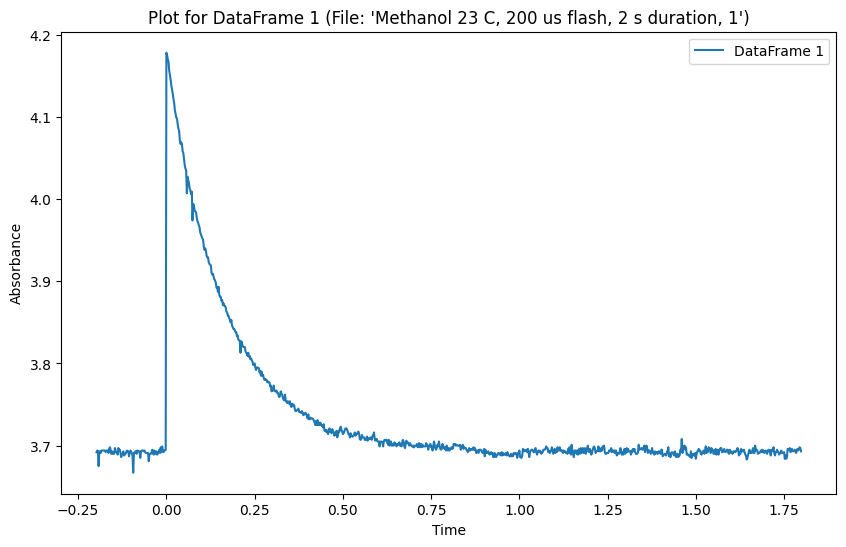

Plotting DataFrame 2 for file 'Methanol 23 C, 200 us flash, 2 s duration, 2':


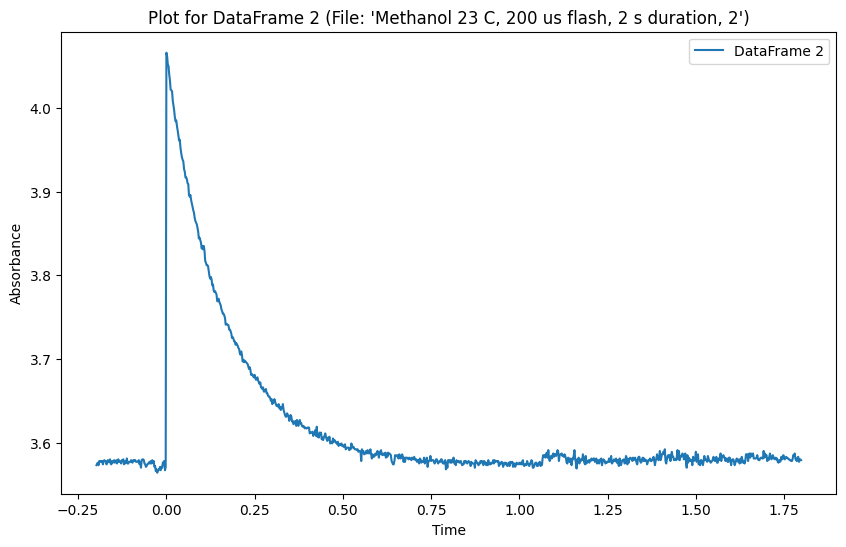

Plotting DataFrame 3 for file 'Methanol 23 C, 200 us flash, 2 s duration, 3':


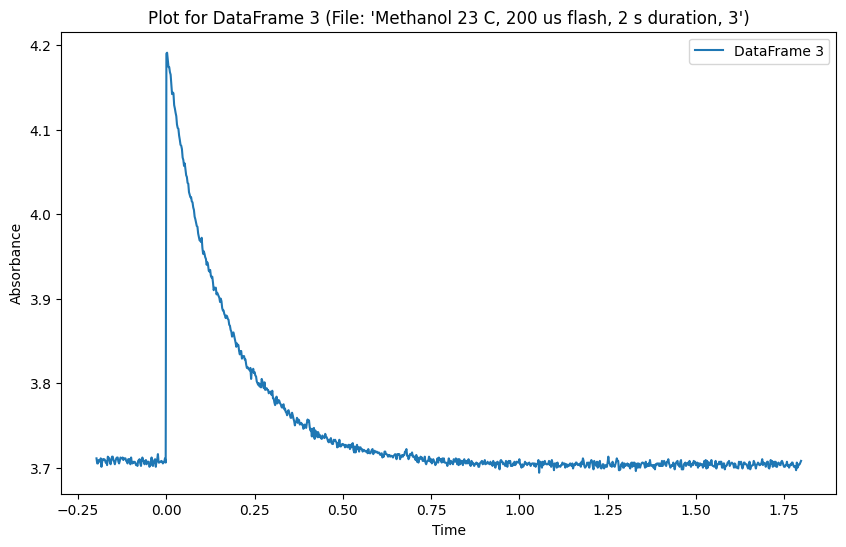

Plotting DataFrame 4 for file 'Methanol 23 C, 200 us flash, 2 s duration, 5':


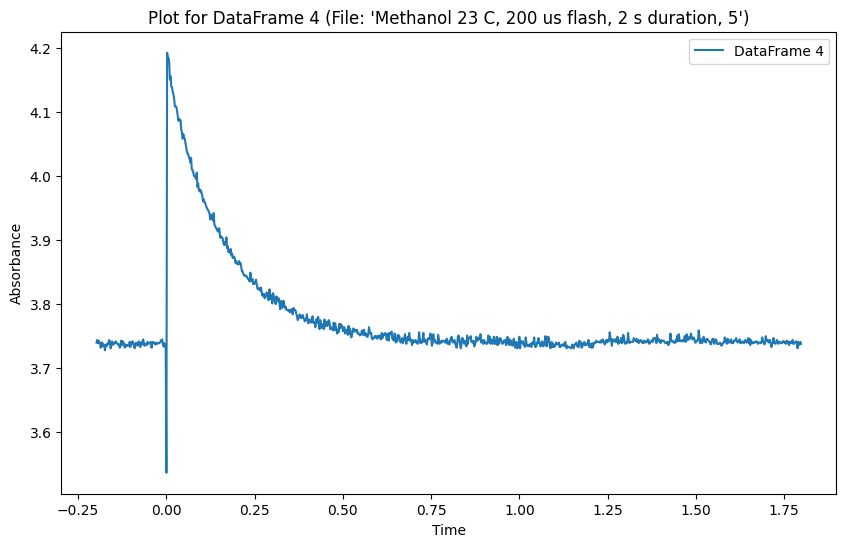

Plotting DataFrame 5 for file 'Methanol 23 C, 200 us flash, 2 s duration, 4':


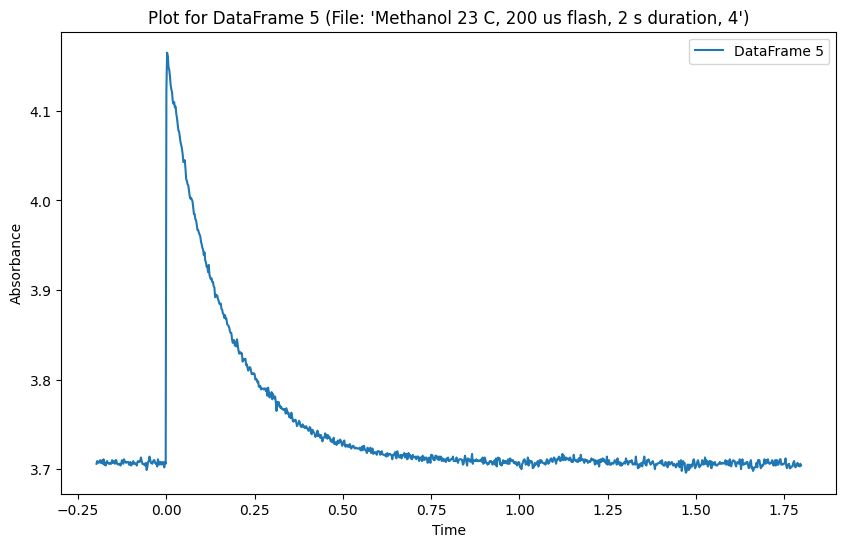

Plotting DataFrame 6 for file 'Methanol 33 C, 200 us flash, 2 s duration, 2':


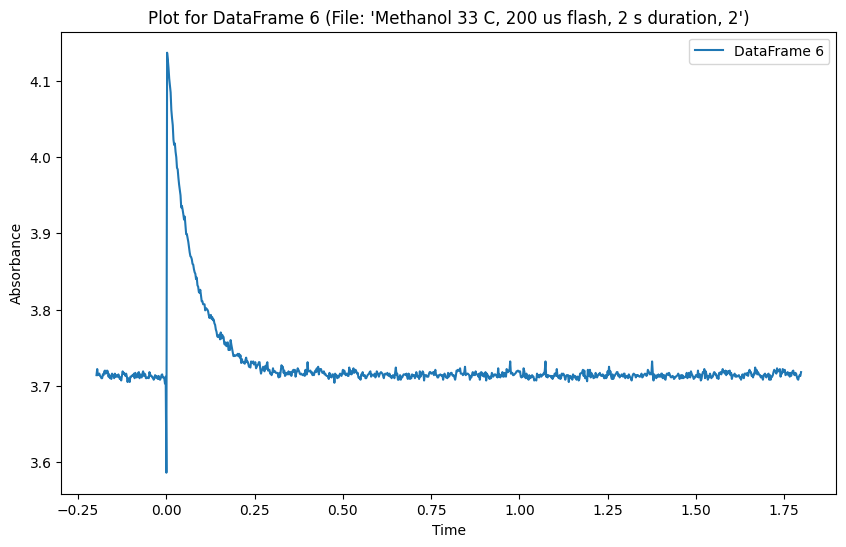

Plotting DataFrame 7 for file 'Methanol 33 C, 200 us flash, 2 s duration, 1':


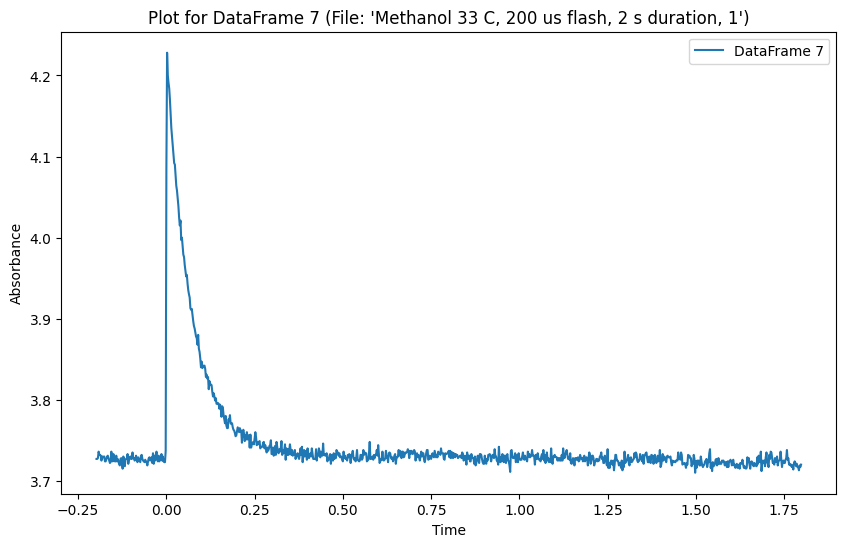

Plotting DataFrame 8 for file 'Methanol 28 C, 200 us flash, 2 s duration, 1':


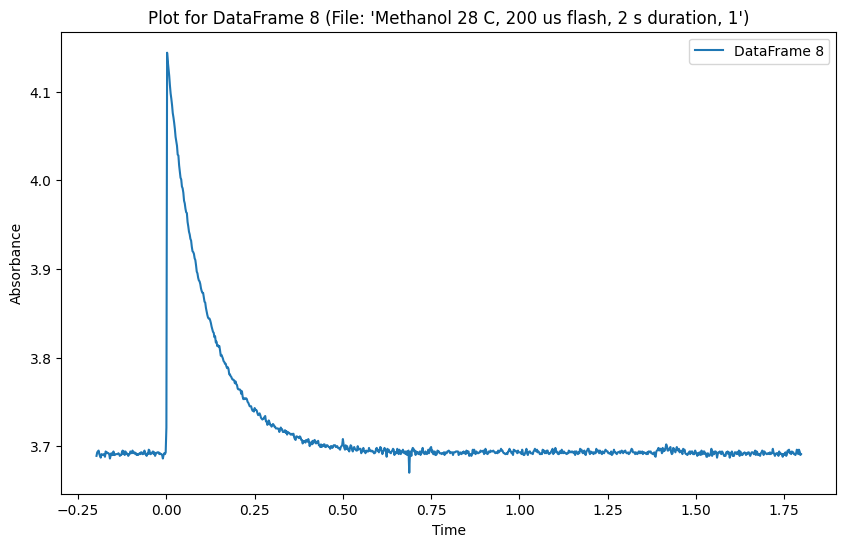

Plotting DataFrame 9 for file 'Methanol 33 C, 200 us flash, 2 s duration, 5':


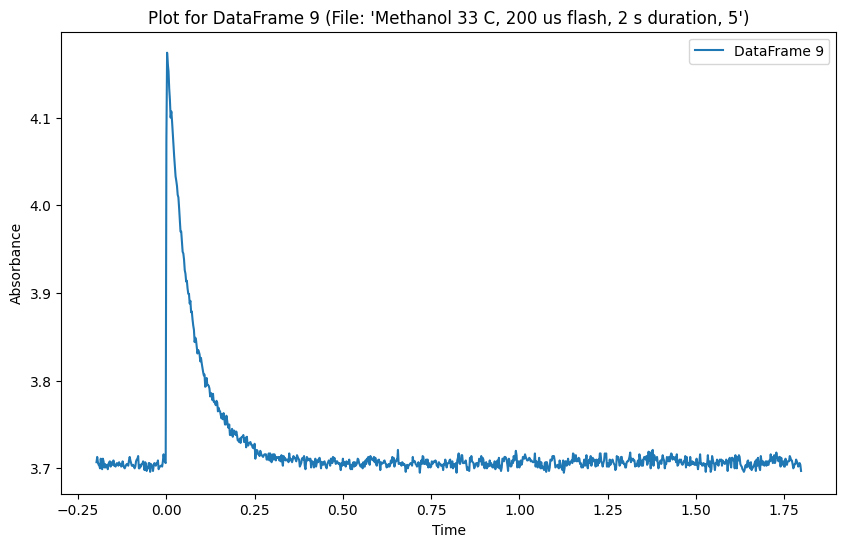

Plotting DataFrame 10 for file 'Methanol 43 C, 200 us flash, 0.5 s duration, 2':


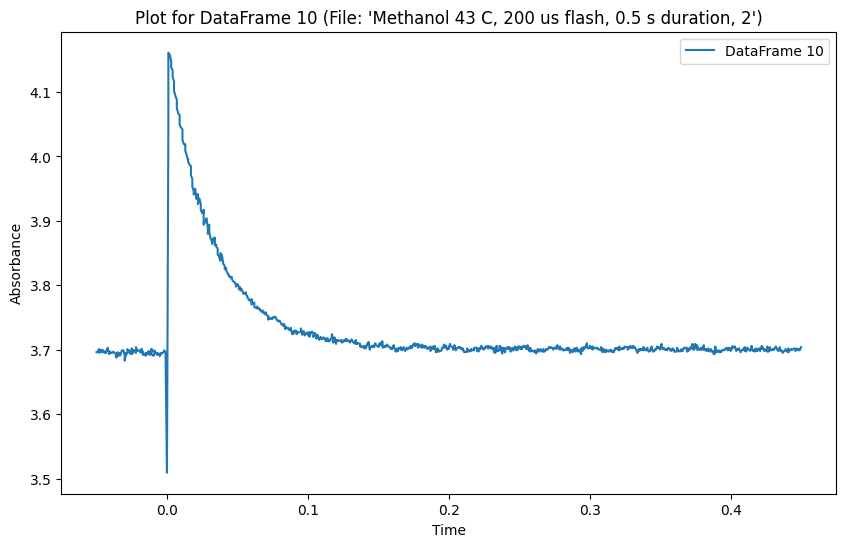

Plotting DataFrame 11 for file 'Methanol 28 C, 200 us flash, 2 s duration, 4':


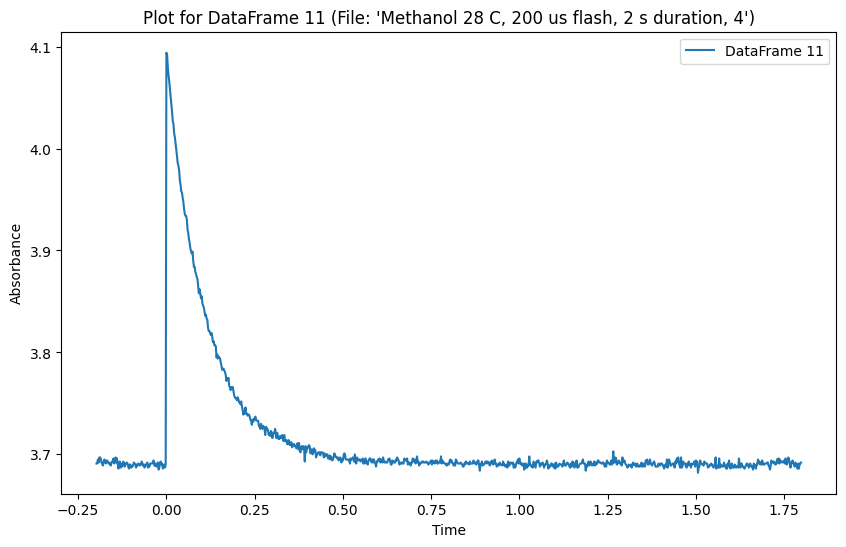

Plotting DataFrame 12 for file 'Methanol 38 C, 200 us flash, 2 s duration, 3':


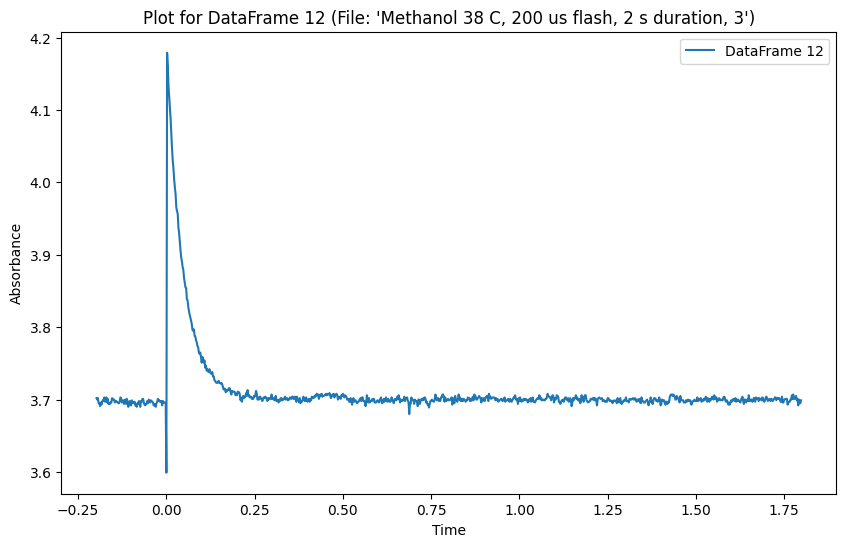

Plotting DataFrame 13 for file 'Methanol 28 C, 200 us flash, 2 s duration, 5':


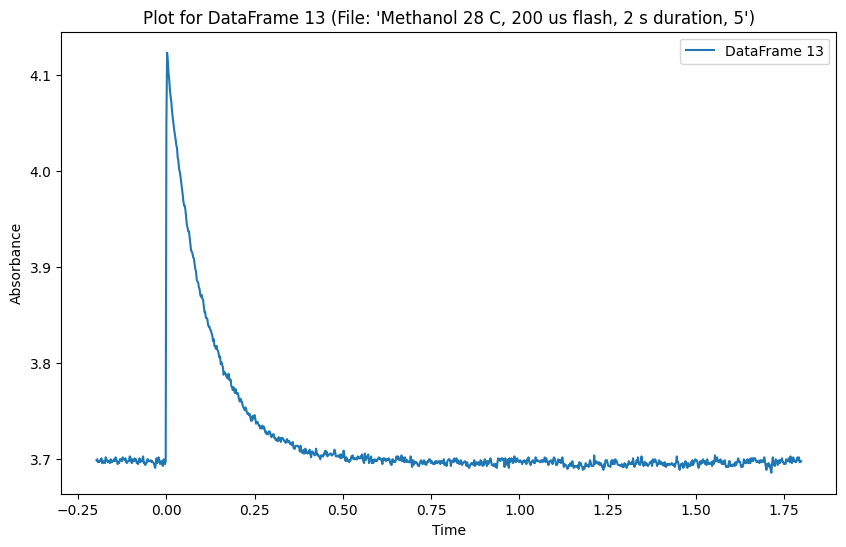

Plotting DataFrame 14 for file 'Methanol 33 C, 200 us flash, 1 s duration, 3':


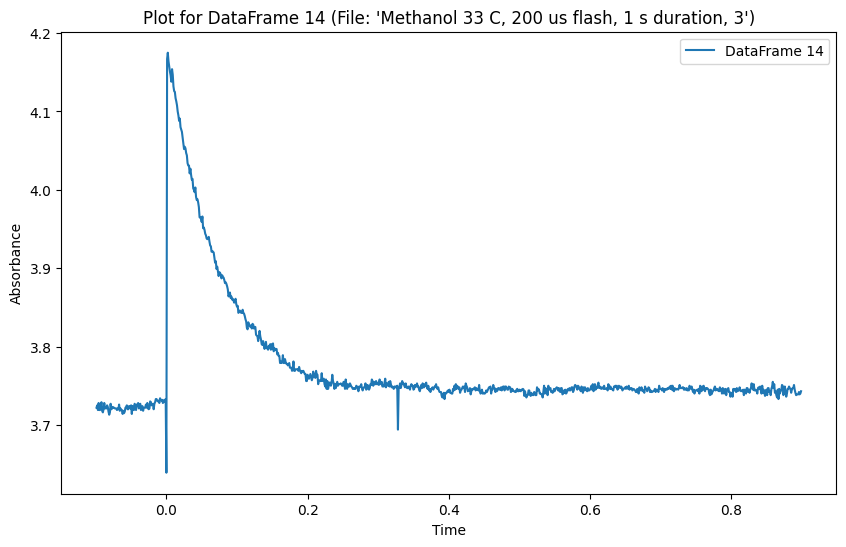

Plotting DataFrame 15 for file 'Methanol 33 C, 200 us flash, 2 s duration, 3':


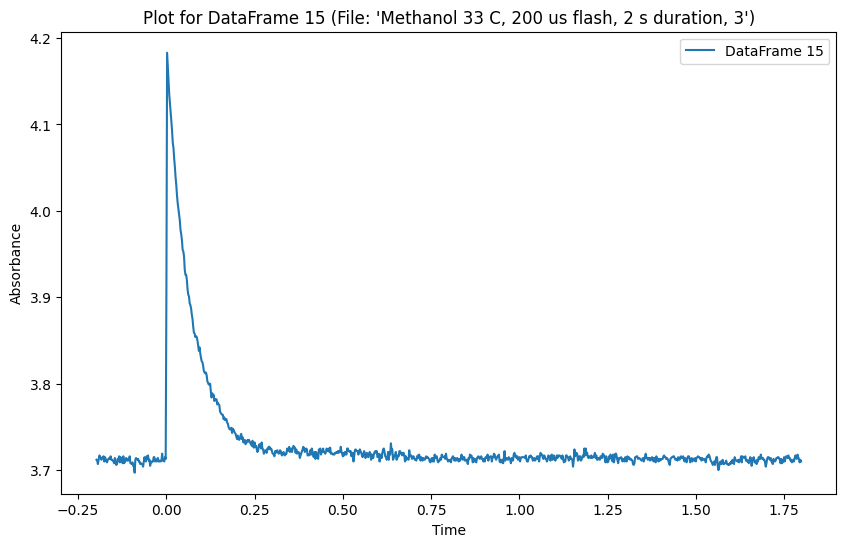

Plotting DataFrame 16 for file 'Methanol 43 C, 200 us flash, 1 s duration, 2':


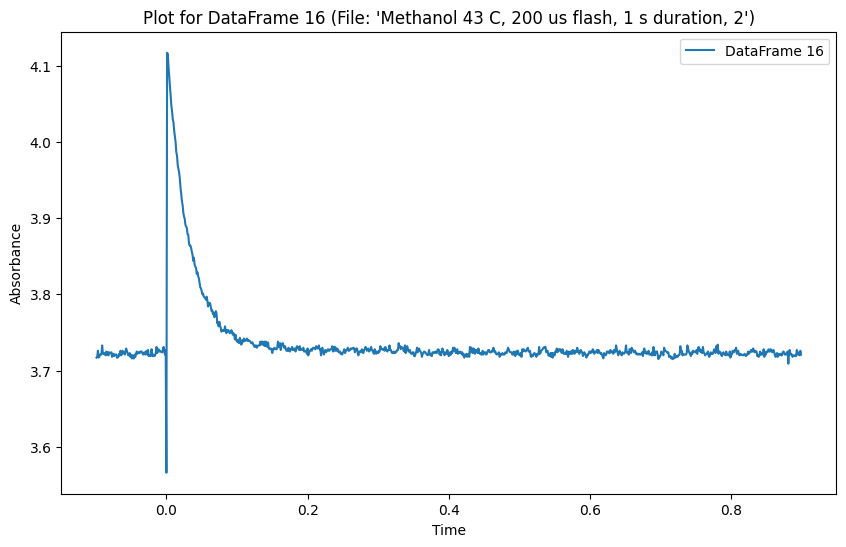

Plotting DataFrame 17 for file 'Methanol 33 C, 200 us flash, 2 s duration, 4':


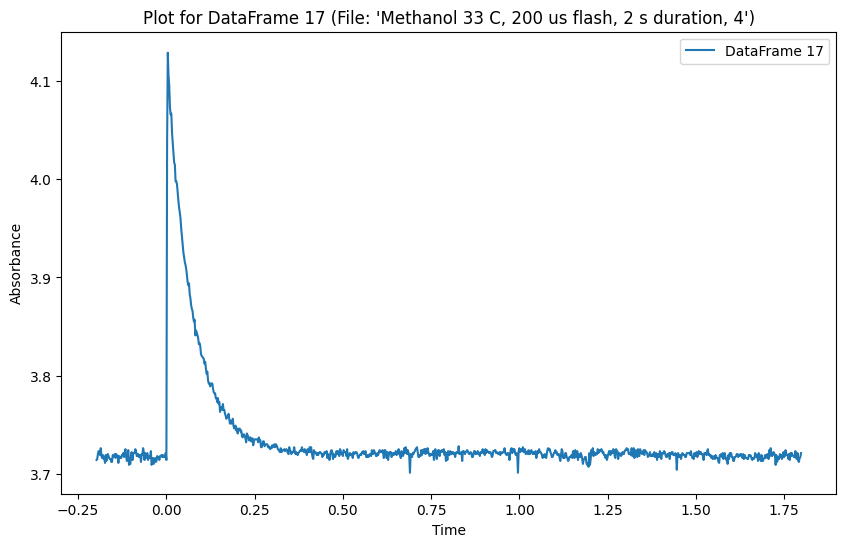

Plotting DataFrame 18 for file 'Methanol 28 C, 200 us flash, 2 s duration, 3':


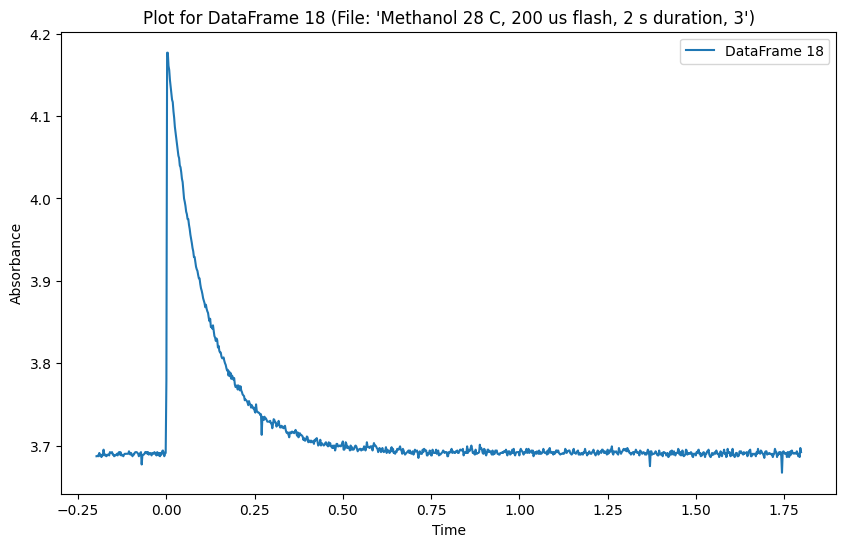

Plotting DataFrame 19 for file 'Methanol 38 C, 200 us flash, 2 s duration, 2':


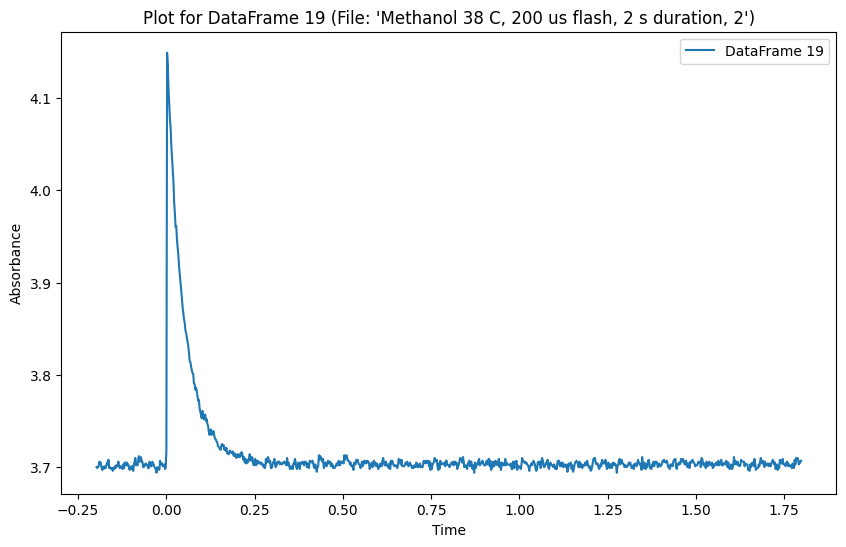

Plotting DataFrame 20 for file 'Methanol 43 C, 200 us flash, 2 s duration, 1':


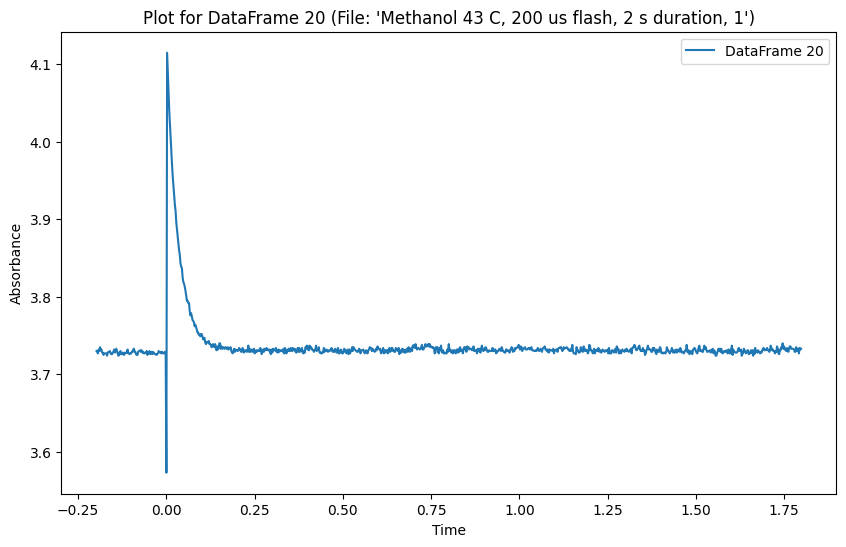

Plotting DataFrame 21 for file 'Methanol 43 C, 200 us flash, 0.5 s duration, 1':


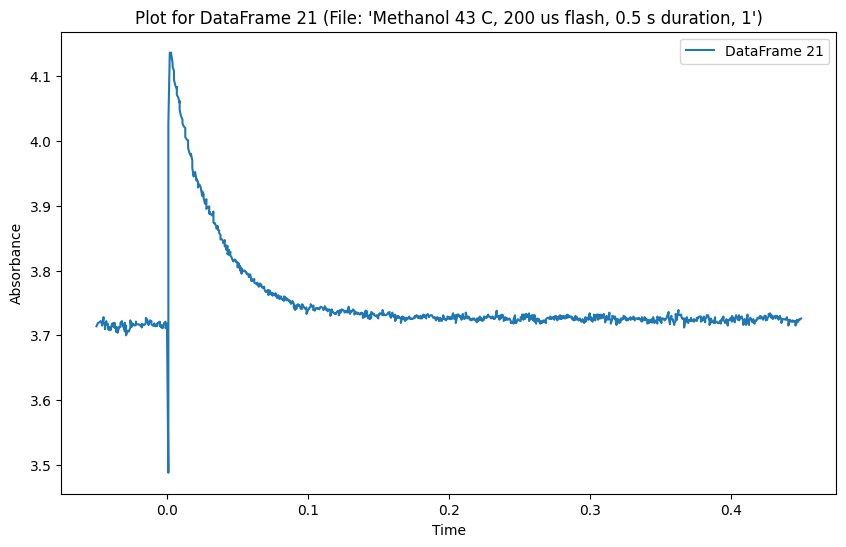

Plotting DataFrame 22 for file 'Methanol 33 C, 200 us flash, 1 s duration, 1':


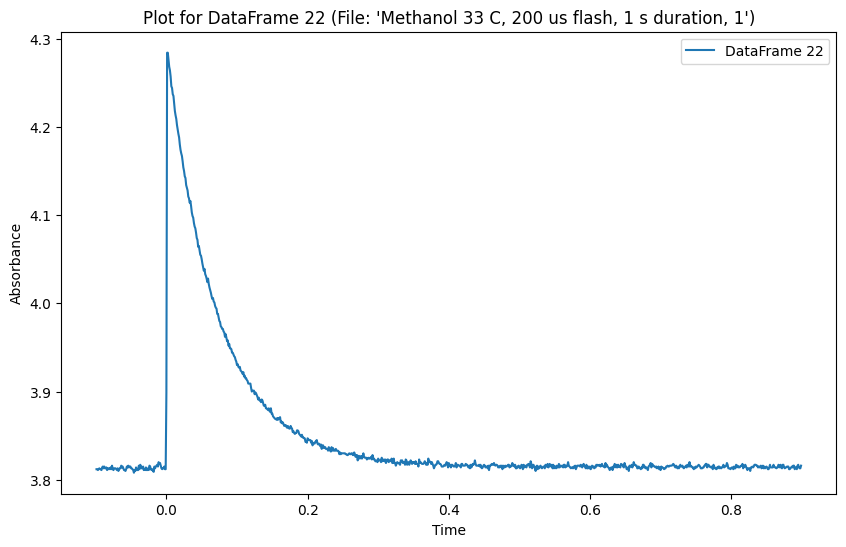

Plotting DataFrame 23 for file 'Methanol 43 C, 200 us flash, 0.5 s duration, 4':


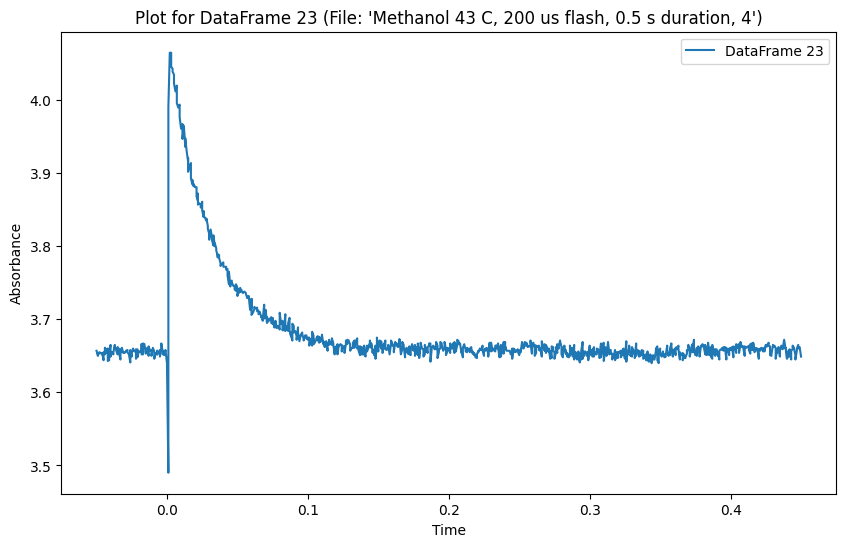

Plotting DataFrame 24 for file 'Methanol 38 C, 200 us flash, 2 s duration, 4':


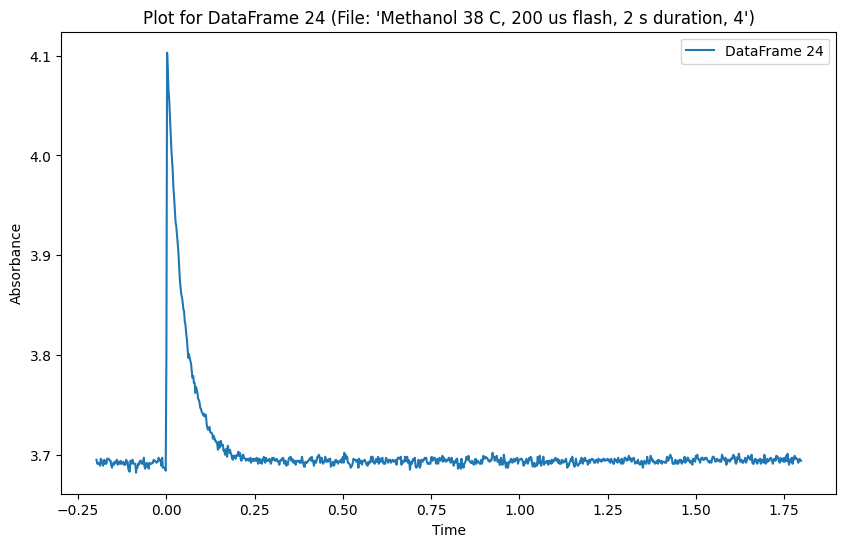

Plotting DataFrame 25 for file 'Methanol 43 C, 200 us flash, 1 s duration, 1':


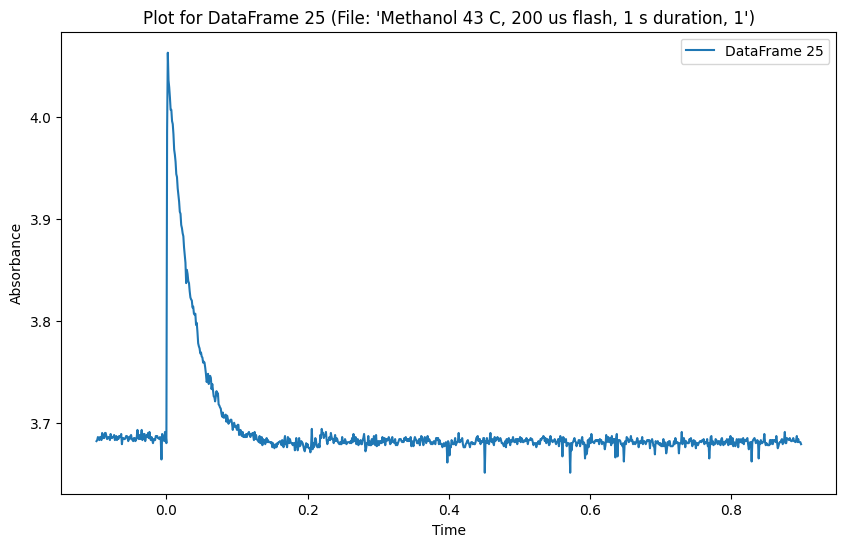

Plotting DataFrame 26 for file 'Methanol 38 C, 200 us flash, 2 s duration, 1':


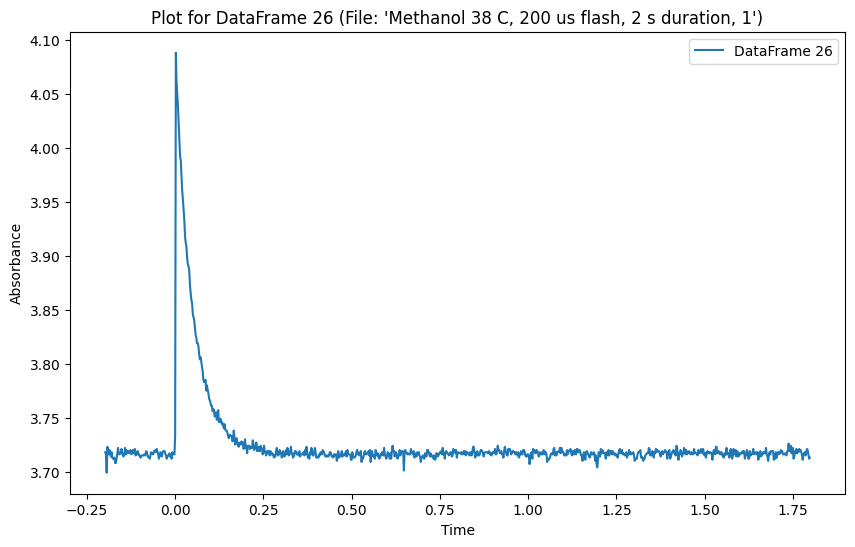

Plotting DataFrame 27 for file 'Methanol 43 C, 200 us flash, 0.5 s duration, 3':


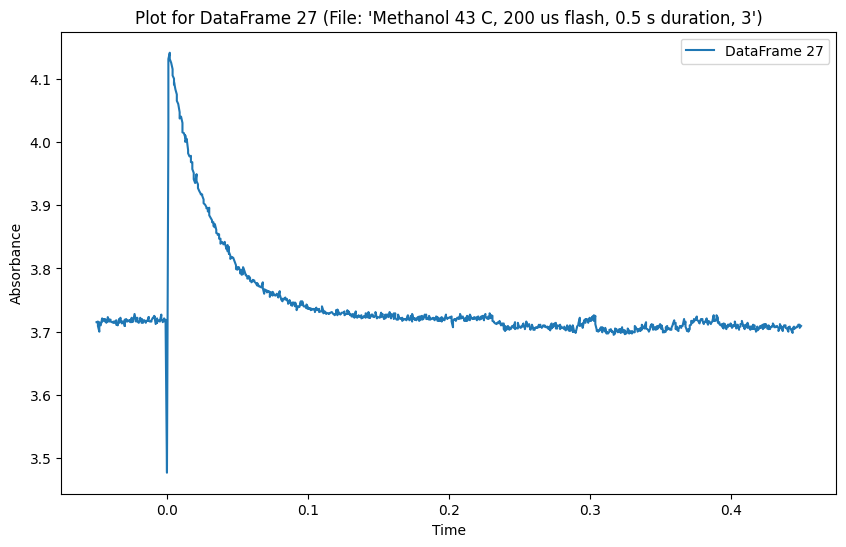

Plotting DataFrame 28 for file 'Methanol 28 C, 200 us flash, 2 s duration, 2':


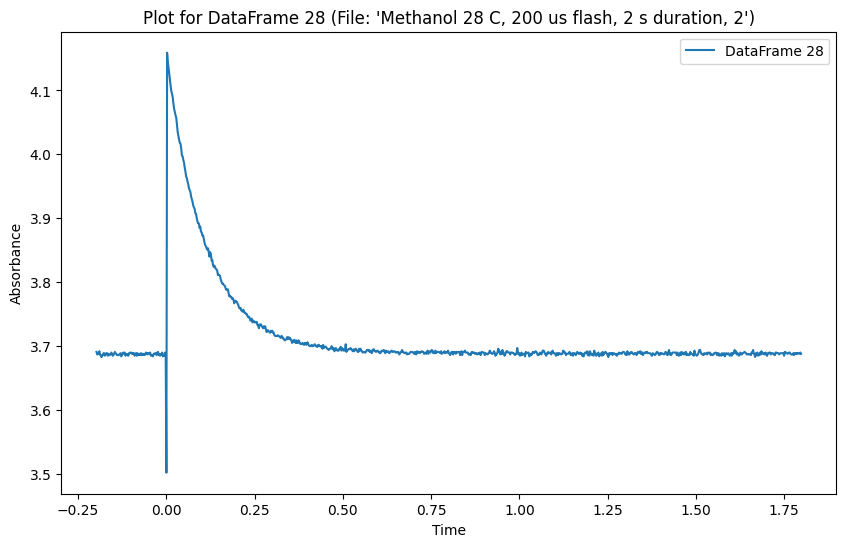

Plotting DataFrame 29 for file 'Methanol 38 C, 200 us flash, 2 s duration, 5':


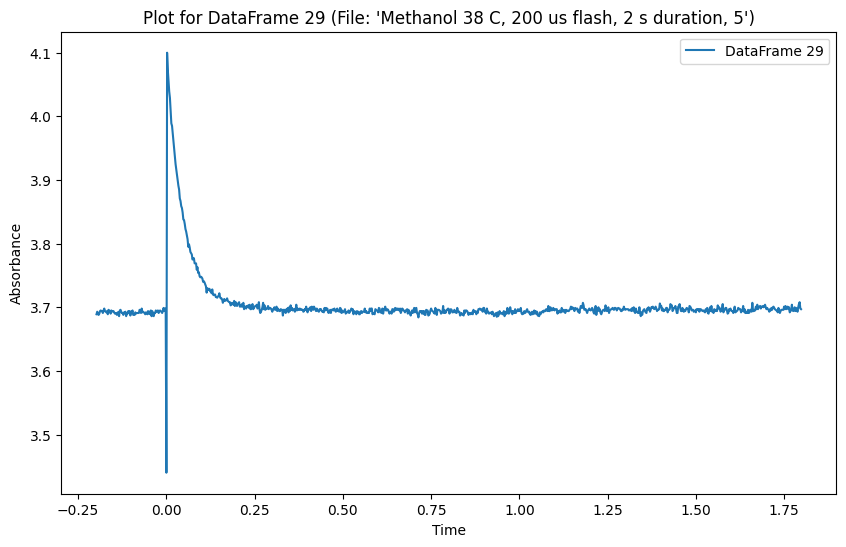

In [5]:
for idx, (filename, df) in enumerate(dfs.items(), start=1):
    print(f"Plotting DataFrame {idx} for file '{filename}':")

    # Extract columns for plotting (modify this based on your column names)
    time_column = df.columns[0]
    y_column = df.columns[1]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df[time_column], df[y_column], label=f"DataFrame {idx}")

    # Customize plot labels, title, and legend
    plt.xlabel("Time")
    plt.ylabel("Absorbance")
    plt.title(f"Plot for DataFrame {idx} (File: '{filename}')")
    plt.legend()

    # Show the plot
    plt.show()
    # Calculate the average y value for x in the range [-0.25, 0]
    x_range_start = -0.25
    x_range_end = 0
    filtered_df = df[(df[time_column] >= x_range_start) & (df[time_column] <= x_range_end)]
    A_ini = filtered_df[y_column].mean()

    # Calculate the average y value for x in the range [0.75, last x]
    num_x_values = len(df[time_column])
    middle_point_index = num_x_values // 2
    x_range_start_1 = df[time_column].iloc[middle_point_index]
    x_range_end_1 = df[time_column].iloc[-3]
    filtered_df_1 = df[(df[time_column] >= x_range_start_1) & (df[time_column] <= x_range_end_1)]
    A_inf = filtered_df_1[y_column].mean()
    # Find the maximum y value on the graph
    A0 = df[y_column].max()
    # Add the results to the 'info' DataFrame
    if idx - 1 < len(info):
        info.at[idx - 1, 'A-initial'] = A_ini
        info.at[idx - 1, 'A-inf'] = A_inf
        info.at[idx - 1, 'A0'] = A0
    else:
        print(f"Warning: DataFrame {idx} does not have a corresponding row in 'info'. Skipping.")



In [6]:
print(info)

     Solvent Temperature (C) Flash Rate (us)  Duration (s) Experiment Number  \
0   Methanol              23             200           2.0                 1   
1   Methanol              23             200           2.0                 2   
2   Methanol              23             200           2.0                 3   
3   Methanol              23             200           2.0                 5   
4   Methanol              23             200           2.0                 4   
5   Methanol              33             200           2.0                 2   
6   Methanol              33             200           2.0                 1   
7   Methanol              28             200           2.0                 1   
8   Methanol              33             200           2.0                 5   
9   Methanol              43             200           0.5                 2   
10  Methanol              28             200           2.0                 4   
11  Methanol              38            

Gradient for Methanol 23 C, 200 us flash, 2 s duration, 1: -6.123188754398176


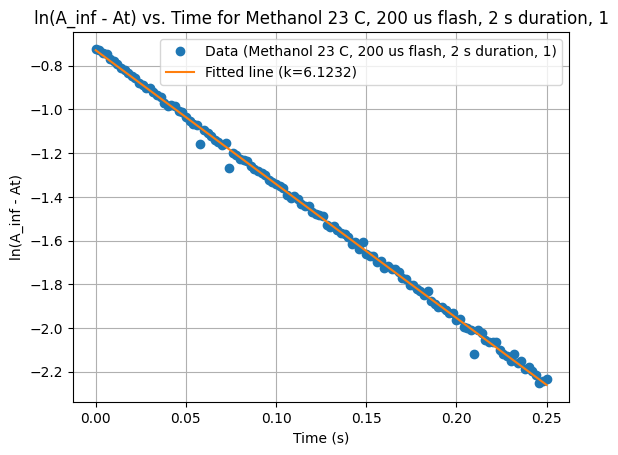


Gradient for Methanol 23 C, 200 us flash, 2 s duration, 2: -6.328440405050616


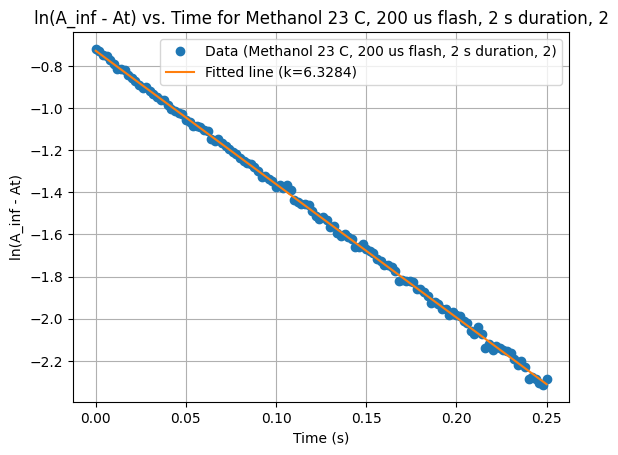


Gradient for Methanol 23 C, 200 us flash, 2 s duration, 3: -6.155655175882035


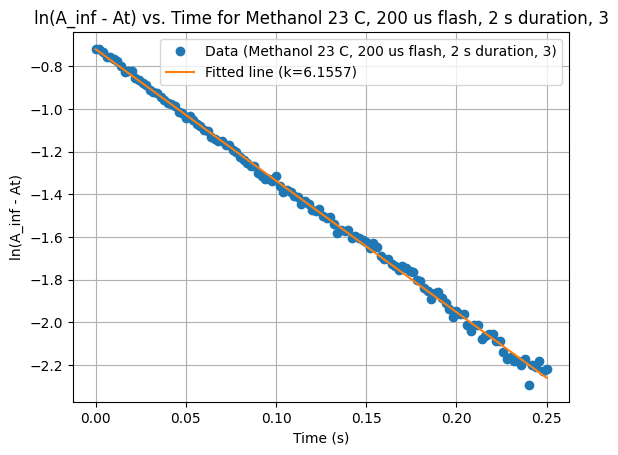


Gradient for Methanol 23 C, 200 us flash, 2 s duration, 5: -6.170810869876728


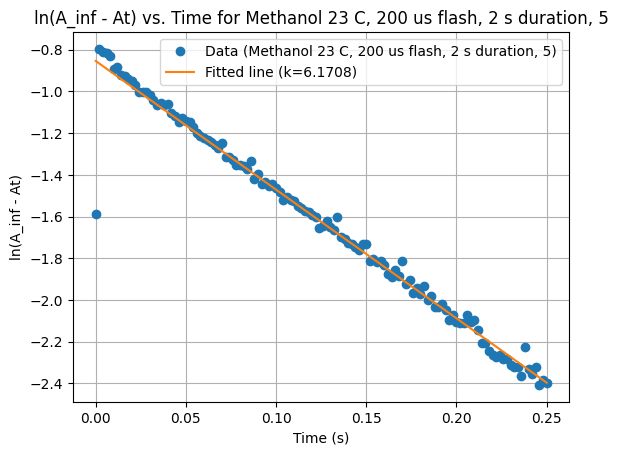


Gradient for Methanol 23 C, 200 us flash, 2 s duration, 4: -6.271549482150874


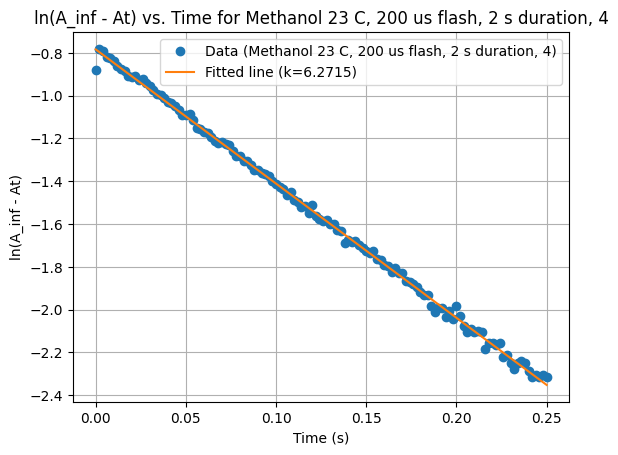


Gradient for Methanol 33 C, 200 us flash, 2 s duration, 2: -13.801782549765587


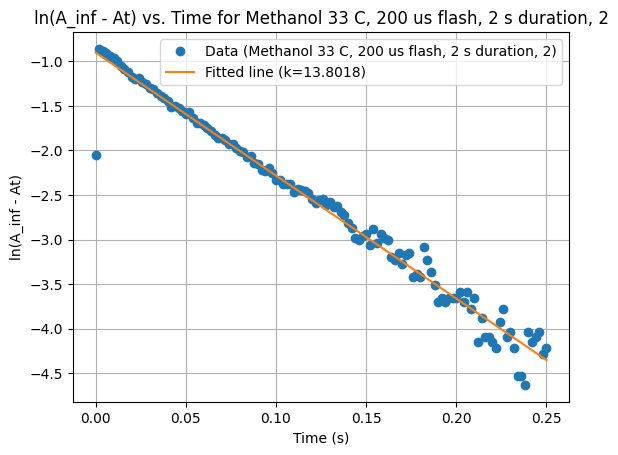


Gradient for Methanol 33 C, 200 us flash, 2 s duration, 1: -12.82842585838861


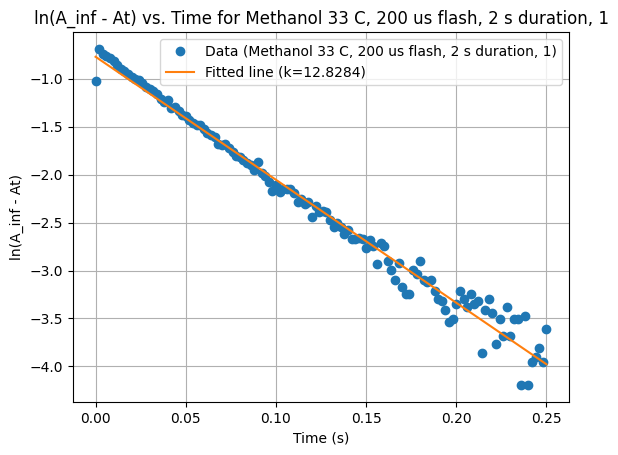


Gradient for Methanol 28 C, 200 us flash, 2 s duration, 1: -8.504157595096407


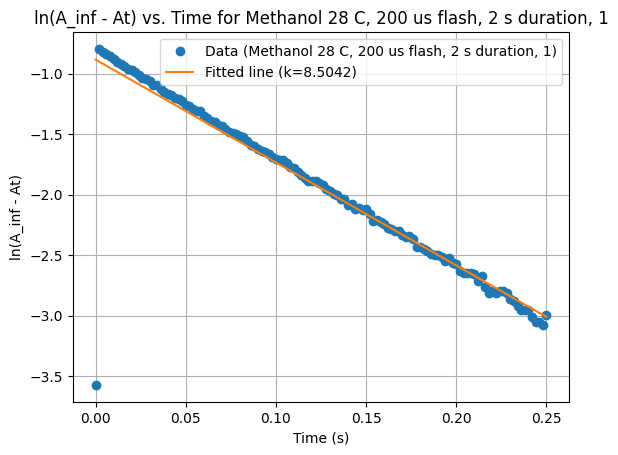


Gradient for Methanol 33 C, 200 us flash, 2 s duration, 5: -13.310290807622183


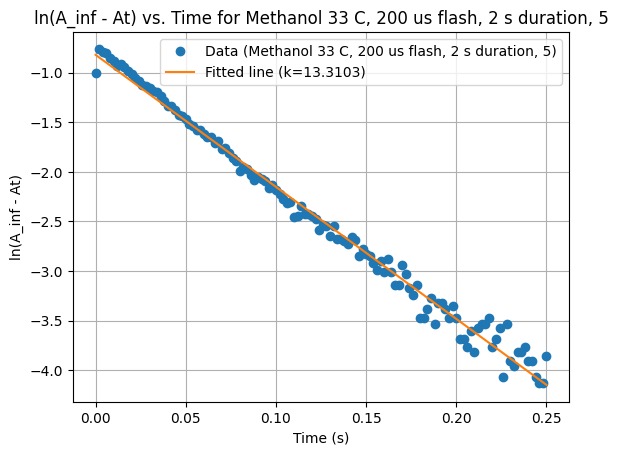


Gradient for Methanol 43 C, 200 us flash, 0.5 s duration, 2: -30.239734458236743


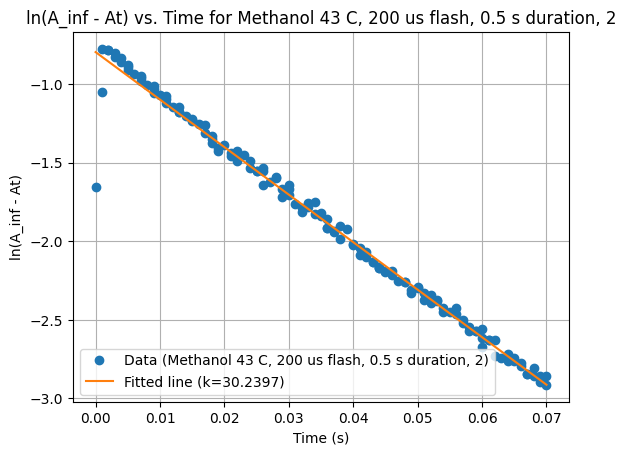


Gradient for Methanol 28 C, 200 us flash, 2 s duration, 4: -9.164102897434566


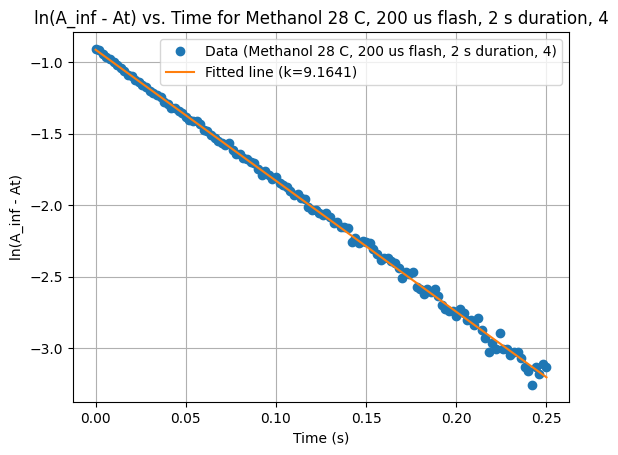


Gradient for Methanol 38 C, 200 us flash, 2 s duration, 3: -20.614053052296864


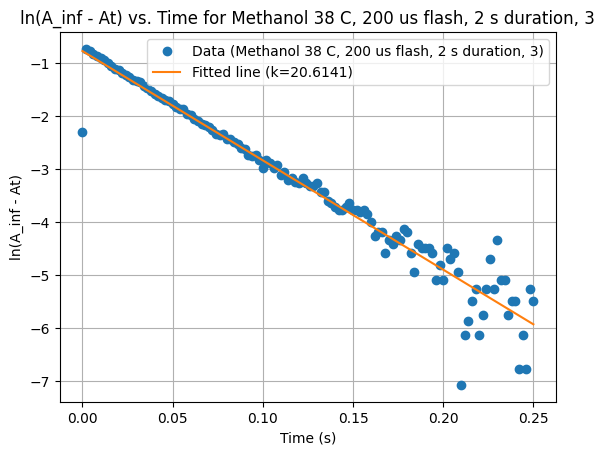


Gradient for Methanol 28 C, 200 us flash, 2 s duration, 5: -8.999721220841693


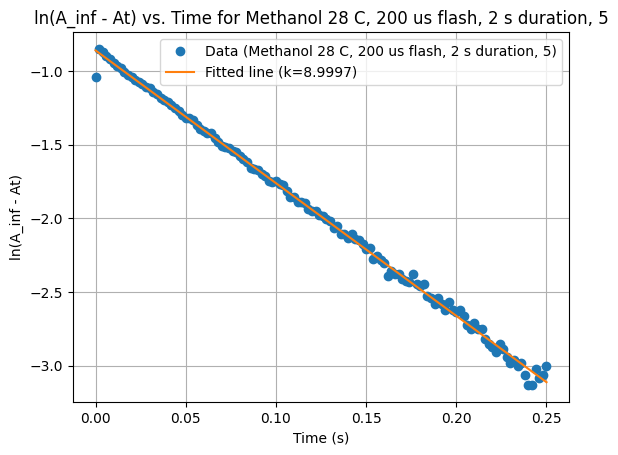


Gradient for Methanol 33 C, 200 us flash, 1 s duration, 3: -13.703051847495315


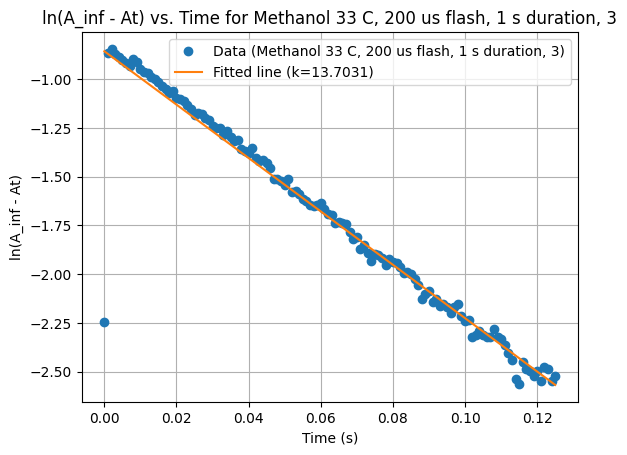


Gradient for Methanol 33 C, 200 us flash, 2 s duration, 3: -13.764283177629602


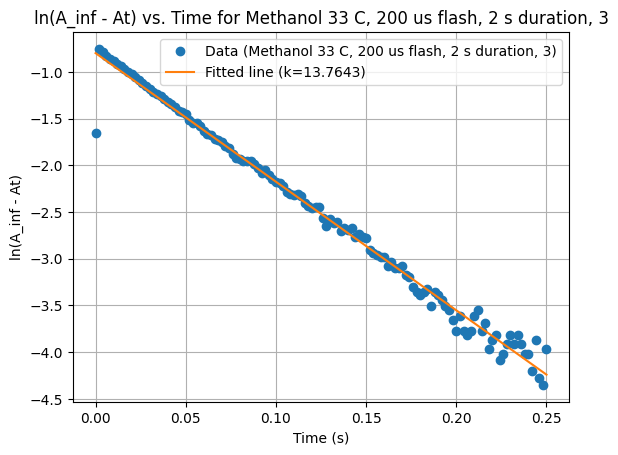


Gradient for Methanol 43 C, 200 us flash, 1 s duration, 2: -29.22597765770294


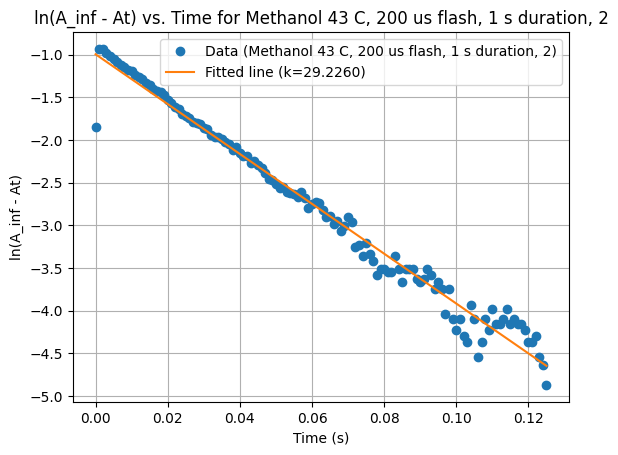


Gradient for Methanol 33 C, 200 us flash, 2 s duration, 4: -12.982524232329189


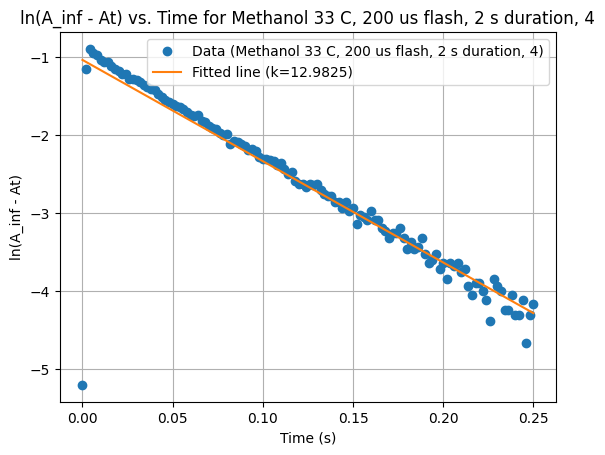


Gradient for Methanol 28 C, 200 us flash, 2 s duration, 3: -8.685878909683746


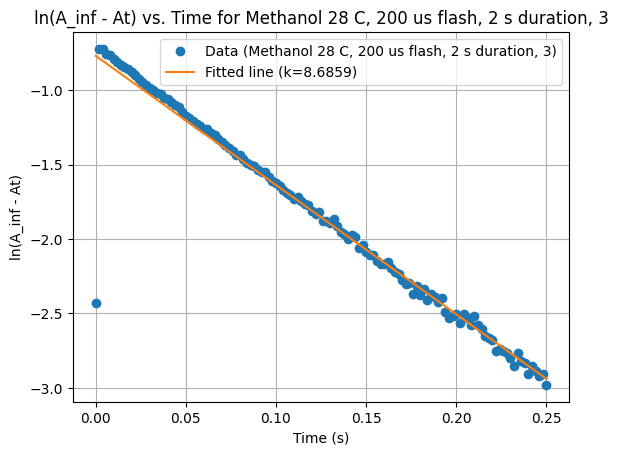


Gradient for Methanol 38 C, 200 us flash, 2 s duration, 2: -19.55402043861949


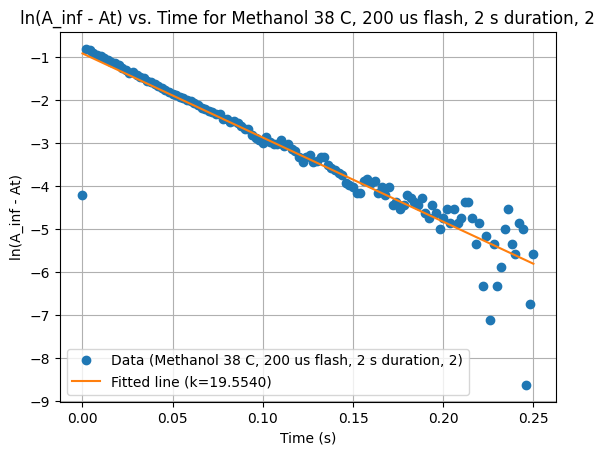


Gradient for Methanol 43 C, 200 us flash, 2 s duration, 1: -27.924683538932012


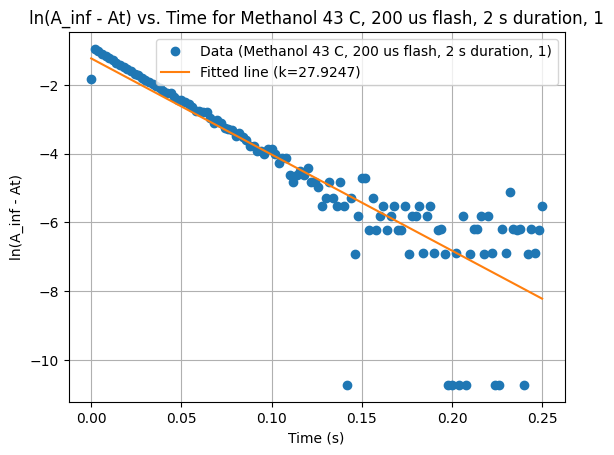


Gradient for Methanol 43 C, 200 us flash, 0.5 s duration, 1: -29.766763027453113


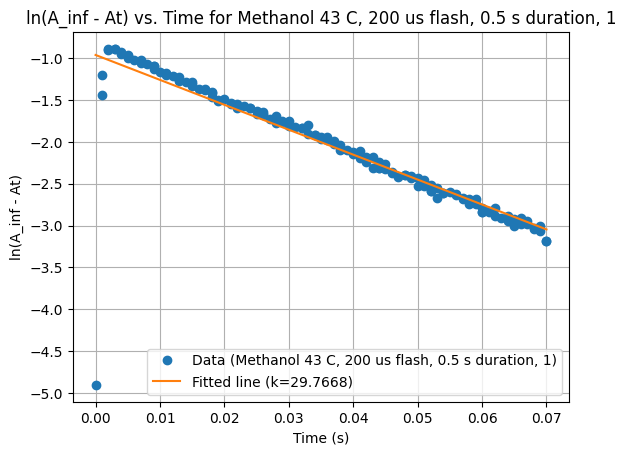


Gradient for Methanol 33 C, 200 us flash, 1 s duration, 1: -13.310132095356485


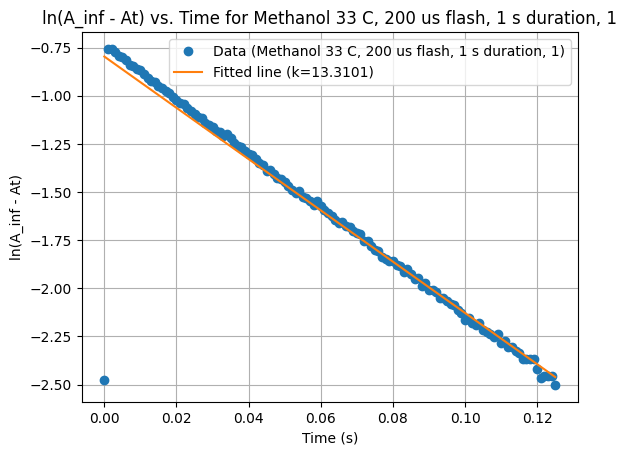


Gradient for Methanol 43 C, 200 us flash, 0.5 s duration, 4: -29.6000300560987


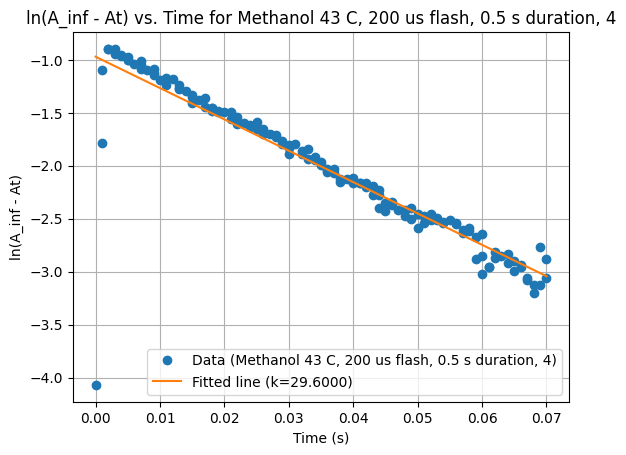


Skipping invalid data for Methanol 38 C, 200 us flash, 2 s duration, 4
Gradient for Methanol 43 C, 200 us flash, 1 s duration, 1: -33.24308781515738


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


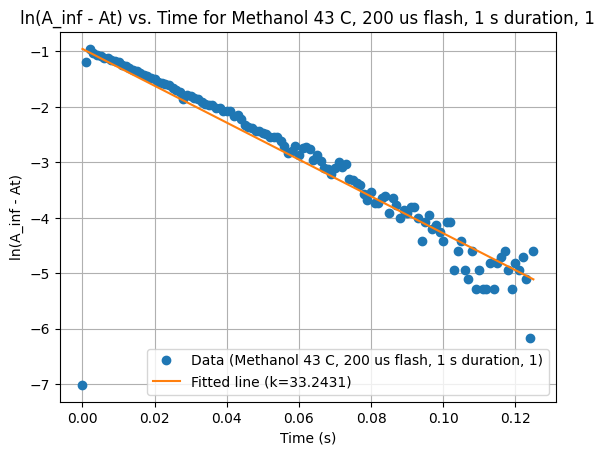


Gradient for Methanol 38 C, 200 us flash, 2 s duration, 1: -19.52394019896775


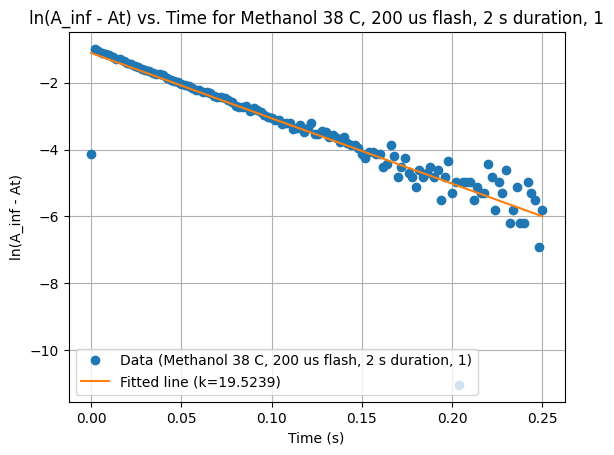


Gradient for Methanol 43 C, 200 us flash, 0.5 s duration, 3: -29.59278575577191


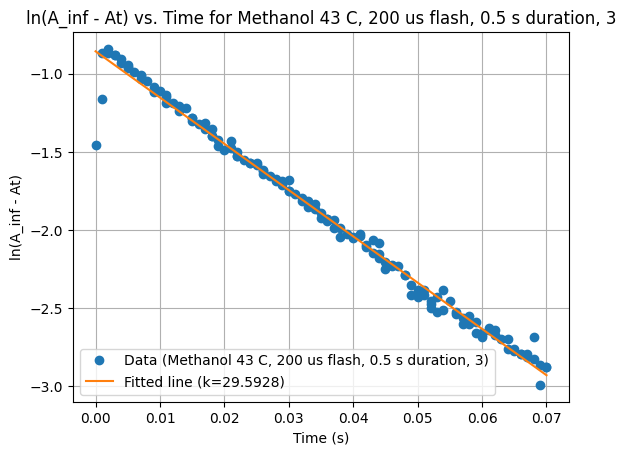


Gradient for Methanol 28 C, 200 us flash, 2 s duration, 2: -8.841811244179453


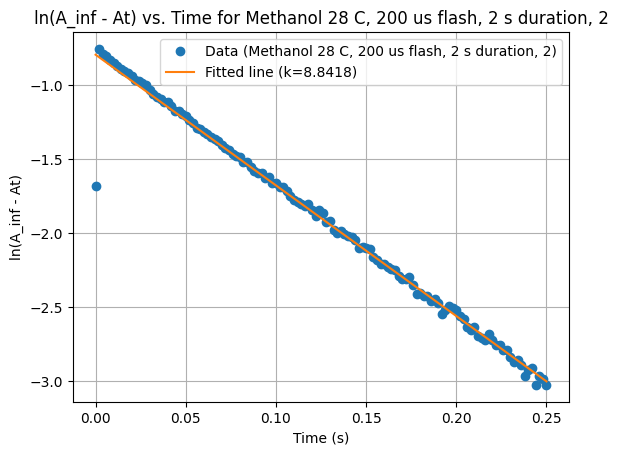


Gradient for Methanol 38 C, 200 us flash, 2 s duration, 5: -18.63621555299573


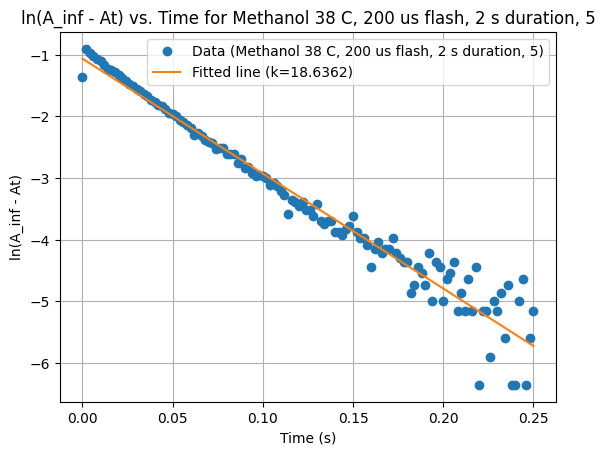

ValueError: Length of values (28) does not match length of index (29)

In [63]:


def plot_equation(filename, df, info):
    gradient_list = []

    for i in range(len(info)):
        duration = info.iloc[i]['Duration (s)']
        a_inf = info.iloc[i]['A-inf']
        a0 = info.iloc[i]['A-initial']

        # Filter data based on duration
        t = df[i].iloc[:, 0]
        at = df[i].iloc[:, 1]

        if duration == 2:
            t_filtered = t[(t <= 0.25) & (t >= 0.0)]
            at_filtered = at[(t <= 0.25) & (t >= 0.0)]
        elif duration == 1:
            t_filtered = t[(t <= 0.125) & (t >= 0.0)]
            at_filtered = at[(t <= 0.125) & (t >= 0.0)]
        elif duration == 0.5:
            t_filtered = t[(t <= 0.07) & (t >= 0.0)]
            at_filtered = at[(t <= 0.07) & (t >= 0.0)]
        else:
            print(f"Skipping invalid duration for file: {filename[i]}")
            continue

        try:
            # Calculate ln(A_inf - At) and ln(A_inf - A0)
            ln_a_inf_minus_at = np.log(np.abs(a_inf - at_filtered))
            ln_a_inf_minus_a0 = np.log(np.abs(a_inf - a0))

            # Check for and handle infinite or NaN values
            if np.any(np.isinf(ln_a_inf_minus_at)) or np.any(np.isnan(ln_a_inf_minus_at)):
                print(f"Skipping invalid data for {filename[i]}")

                continue

            # Create a Linear Regression model
            model = LinearRegression()
            t_filtered_reshaped = t_filtered.values.reshape(-1, 1)
            ln_a_inf_minus_at_reshaped = ln_a_inf_minus_at.values.reshape(-1, 1)

            # Fit the model
            model.fit(t_filtered_reshaped, ln_a_inf_minus_at_reshaped)

            # Get the gradient (coefficient)
            k = model.coef_[0][0]
            gradient_list.append(-k)
            print(f"Gradient for {filename[i]}: {k}")

            # Plot the data and the fitted line
            plt.plot(t_filtered, ln_a_inf_minus_at, 'o', label=f"Data ({filename[i]})")
            plt.plot(t_filtered, model.predict(t_filtered_reshaped), label=f"Fitted line (k={-k:.4f})")
            plt.xlabel('Time (s)')
            plt.ylabel('ln(A_inf - At)')
            plt.title(f"ln(A_inf - At) vs. Time for {filename[i]}")
            plt.grid(True)
            plt.legend()
            plt.show()

            print()

        except Exception as e:
            print(f"Error processing file {filename[i]}: {str(e)}")

    info['gradient (k)'] = gradient_list

# Process each file in the dictionary
#for filename, df in dfs.items():

list_of_filenames = []
list_of_df = []

for filename, df in dfs.items():
  list_of_filenames.append(filename)
  list_of_df.append(df)

#print(np.shape(list_of_filenames), np.shape(list_of_df))

plot_equation(list_of_filenames, list_of_df, info)

#list_of_df[0].iloc[:,0]


6.123188754398174


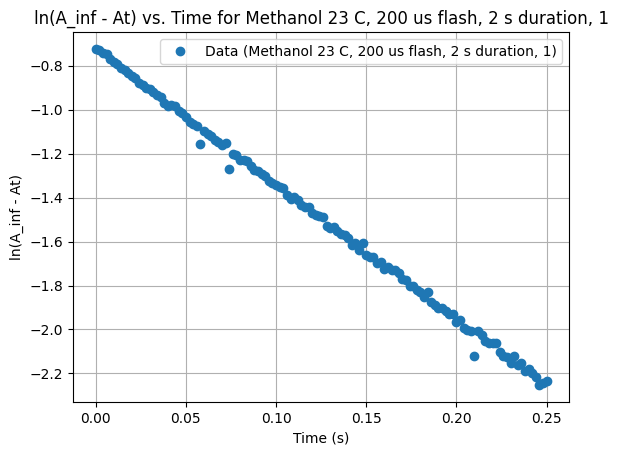


6.3284404050506184


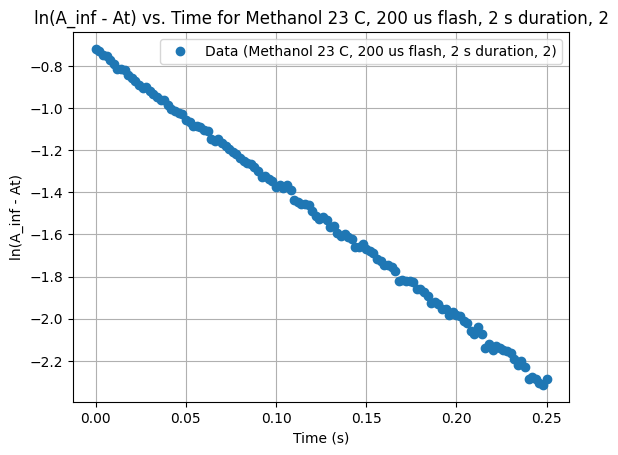


6.155655175882037


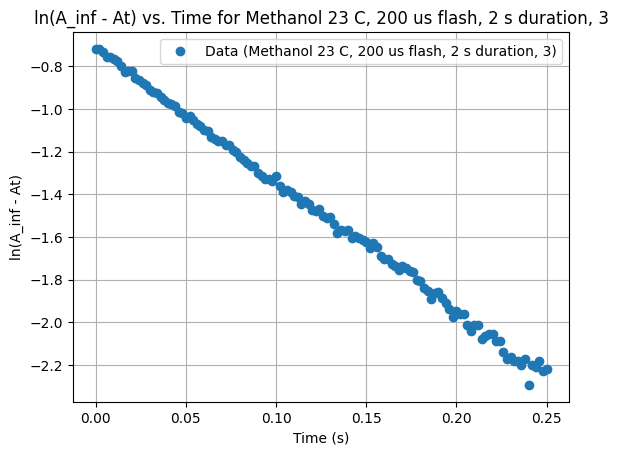


6.170810869876733


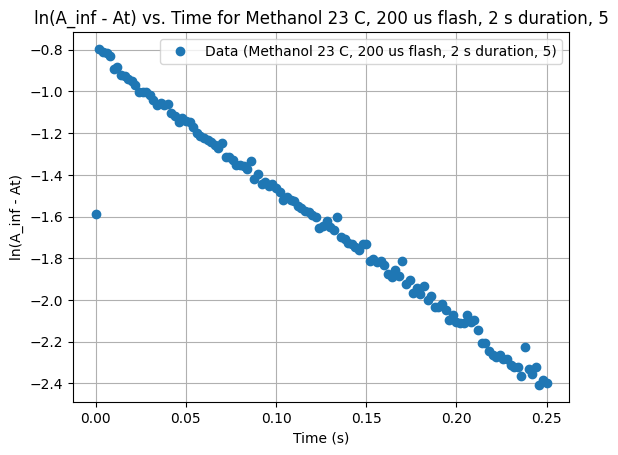


6.271549482150874


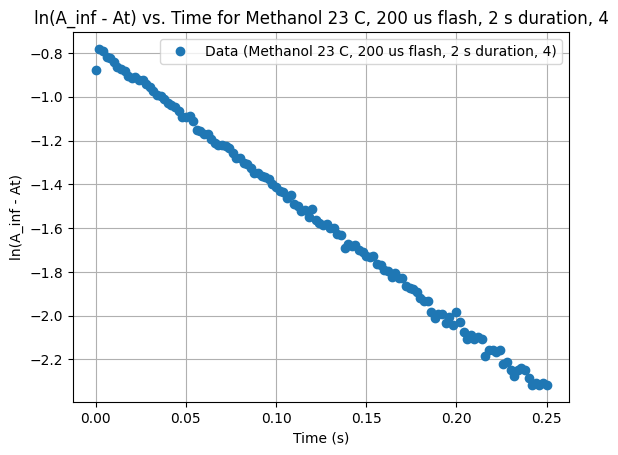


13.801782549765587


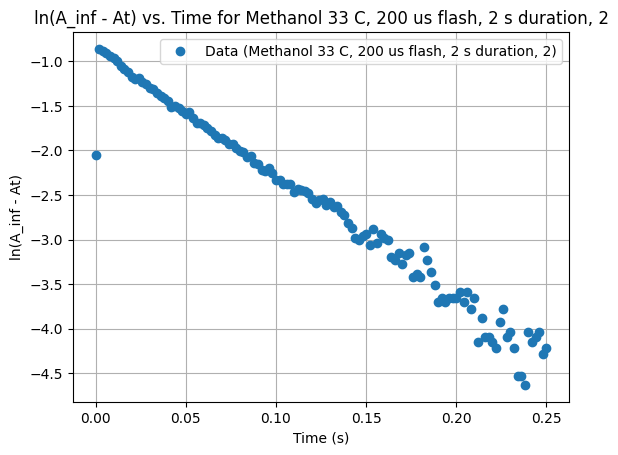


12.828425858388613


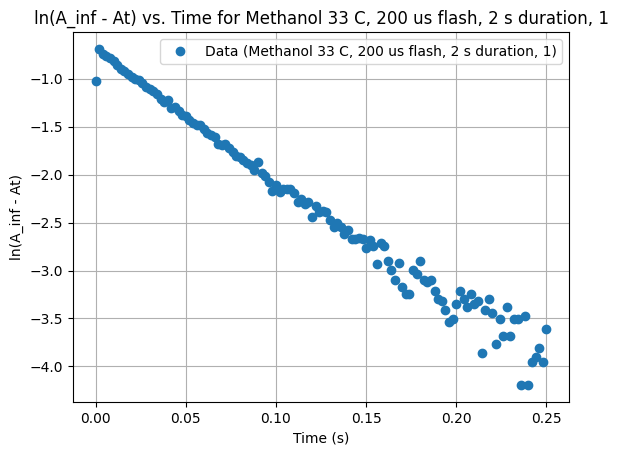


8.504157595096407


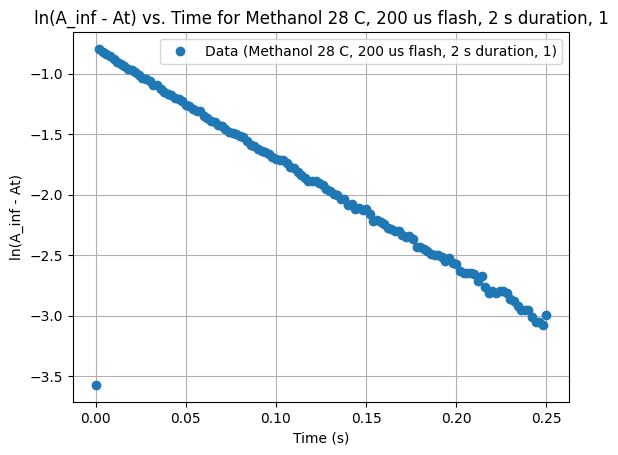


13.310290807622183


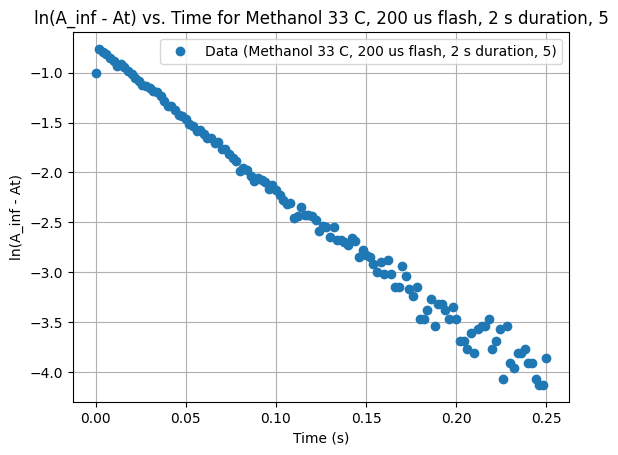


30.239734458236747


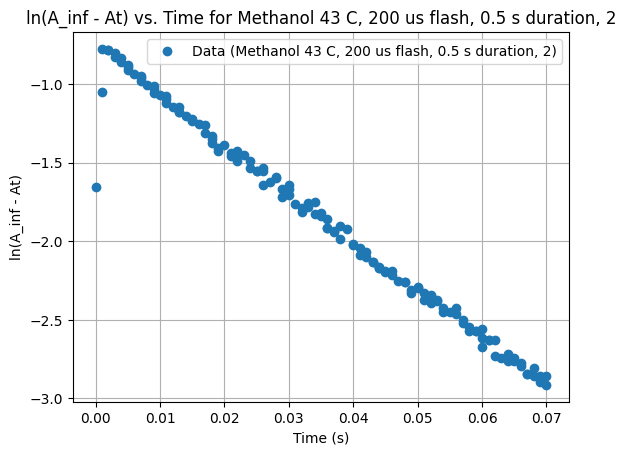


9.164102897434569


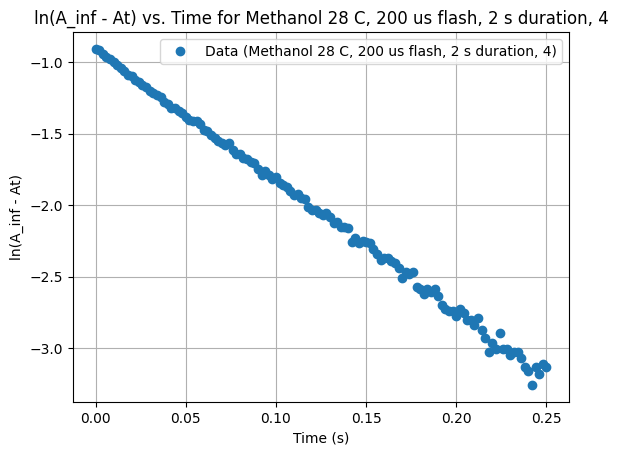


20.614053052296875


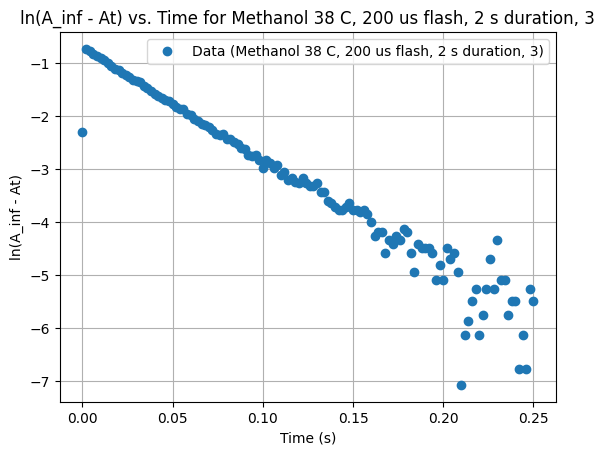


8.999721220841698


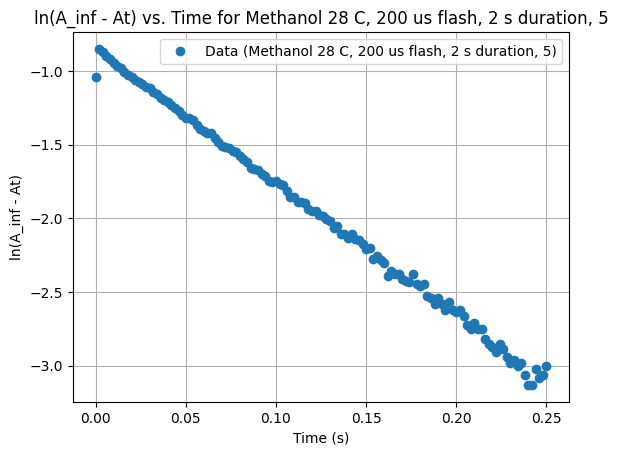


13.70305184749532


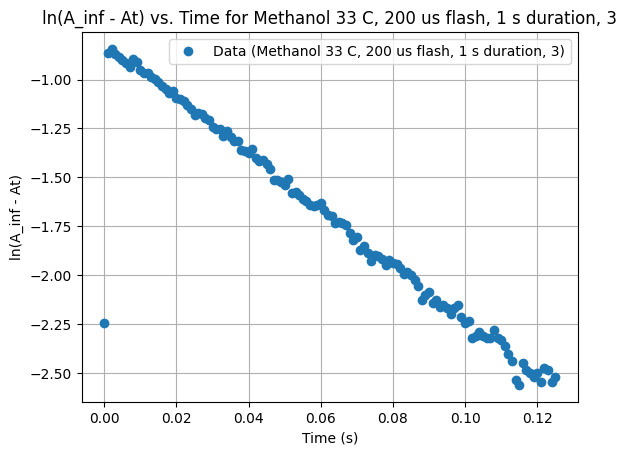


13.764283177629602


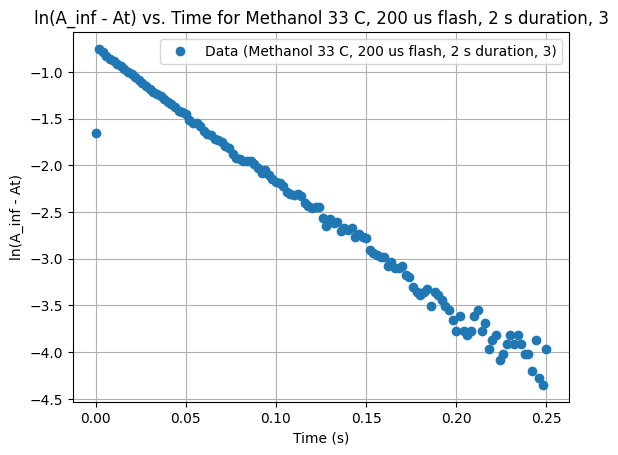


29.22597765770295


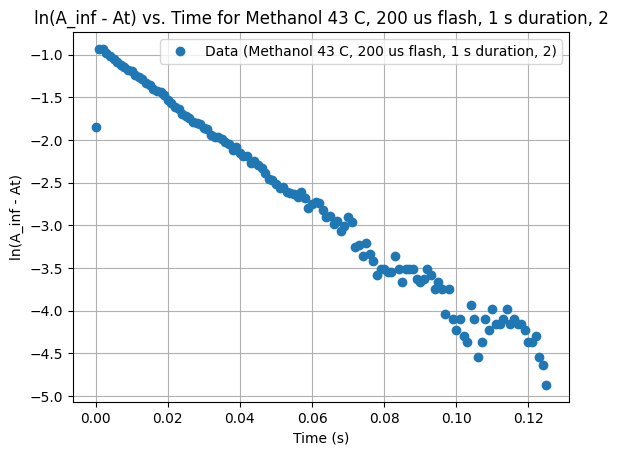


12.982524232329194


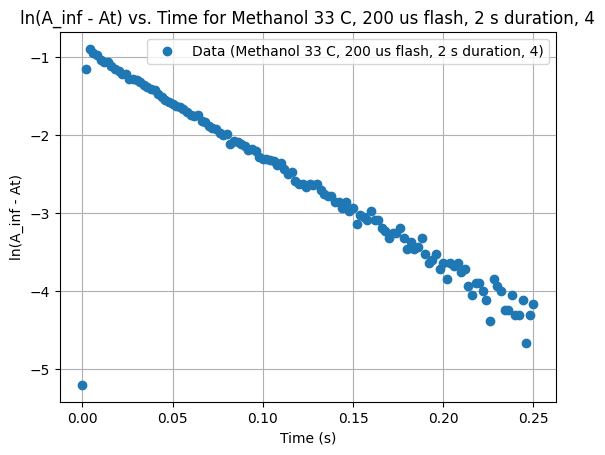


8.68587890968375


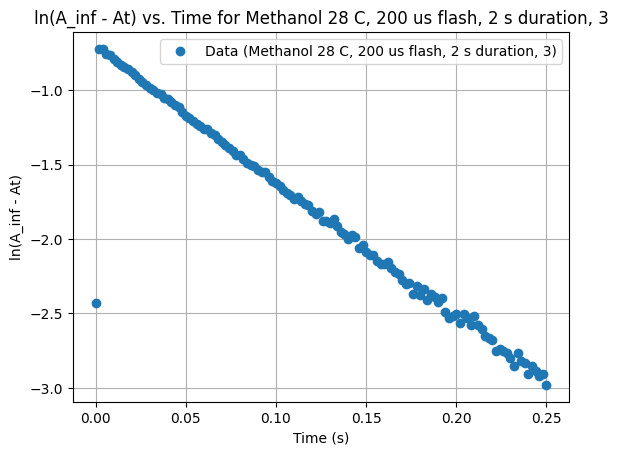


19.554020438619492


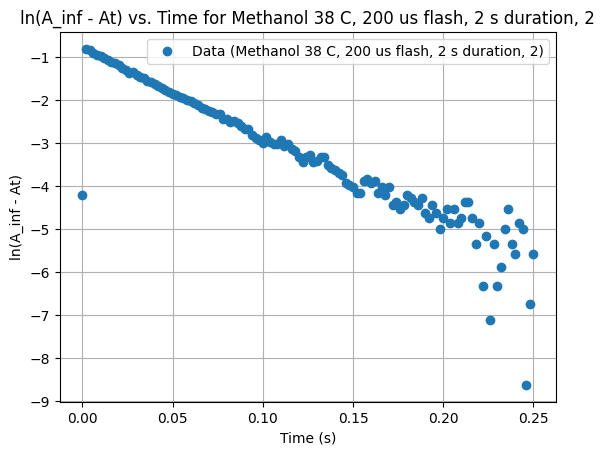


27.92468353893202


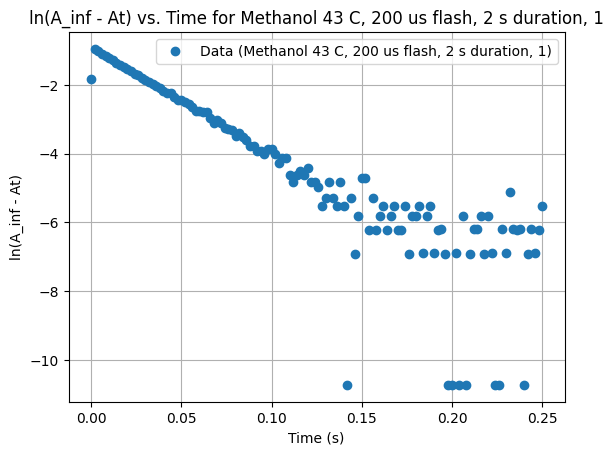


29.76676302745311


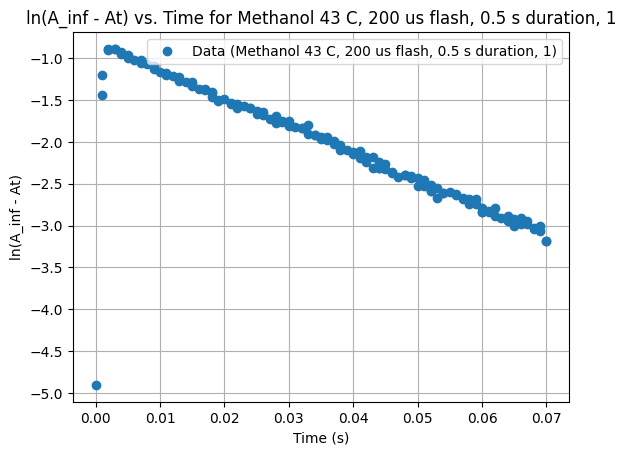


13.310132095356485


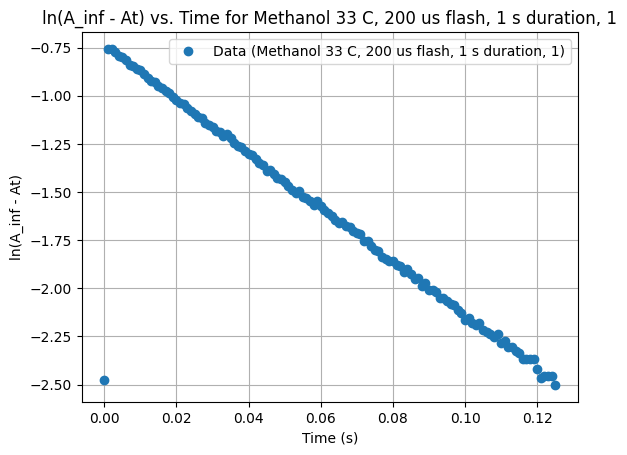


29.600030056098706


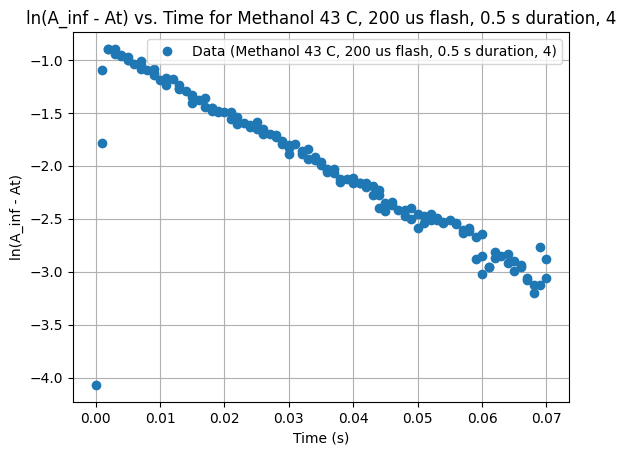


nan


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


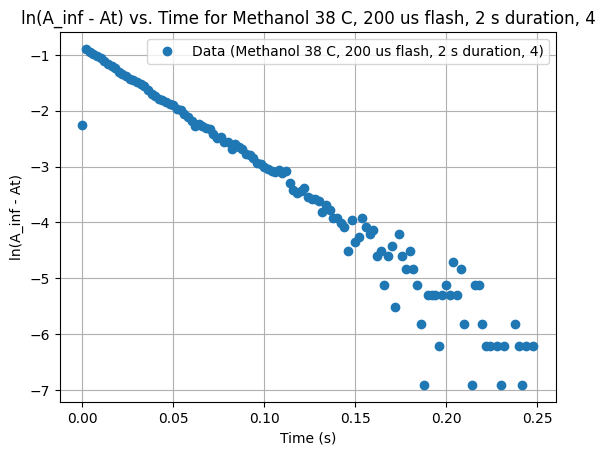


33.243087815157374


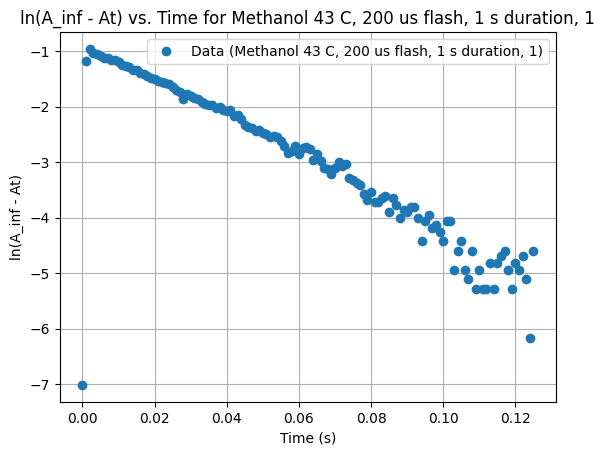


19.52394019896775


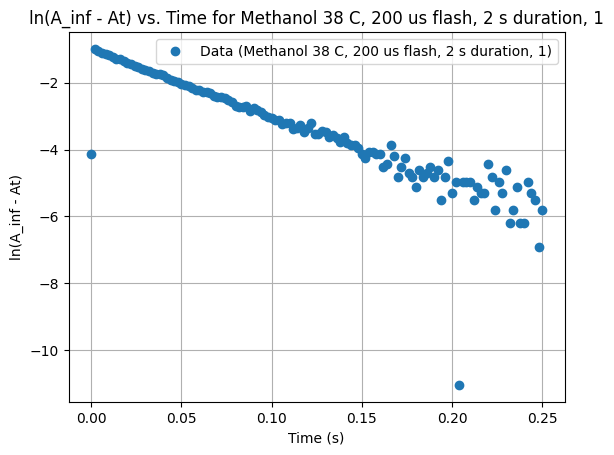


29.592785755771896


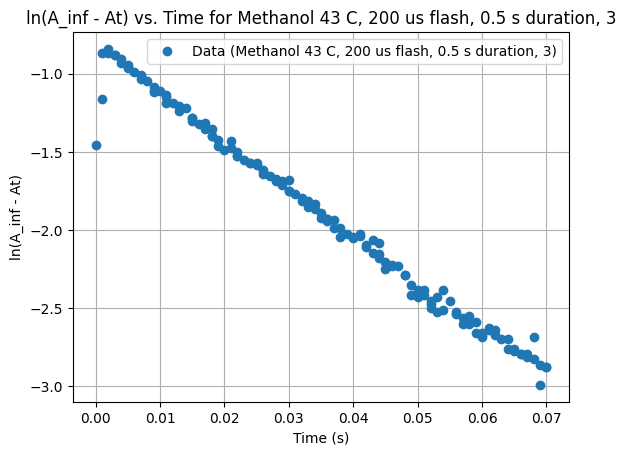


8.841811244179455


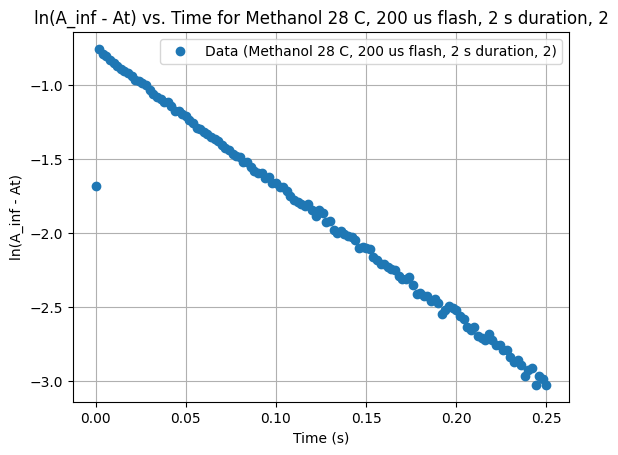


18.636215552995733


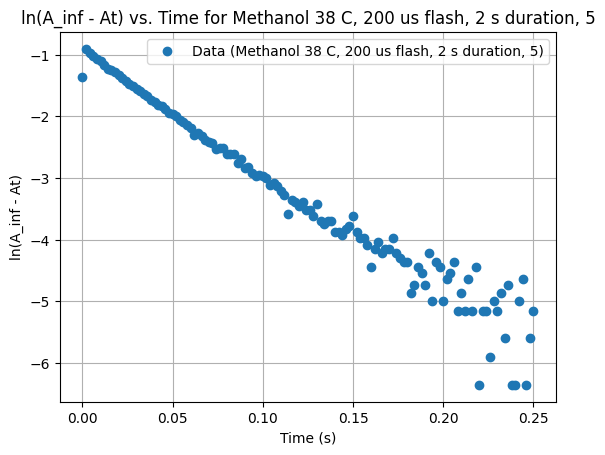

In [48]:

def plot_equation(filename, df, info):
    gradient_list = []
    for i in range(len(info)):
      duration = info.iloc[i]['Duration (s)']
      a_inf = info.iloc[i]['A-inf']
      a0 = info.iloc[i]['A-initial']

      # Filter data based on duration
      t = df[i].iloc[:, 0]
      at = df[i].iloc[:, 1]

      if duration == 2:
          t_filtered = t[(t <= 0.25) & (t >= 0.0)]
          at_filtered = at[(t <= 0.25) & (t >= 0.0)]
      elif duration == 1:
          t_filtered = t[(t <= 0.125) & (t >= 0.0)]
          at_filtered = at[(t <= 0.125) & (t >= 0.0)]
      elif duration == 0.5:
          t_filtered = t[(t <= 0.07) & (t >= 0.0)]
          at_filtered = at[(t <= 0.07) & (t >= 0.0)]
      else:
          raise ValueError(f"Invalid duration: {duration}")


      # Calculate ln(A_inf - At) and ln(A_inf - A0)
      ln_a_inf_minus_at = np.log(np.abs(a_inf - at_filtered))
      ln_a_inf_minus_a0 = np.log(np.abs(a_inf - a0))

      # Calculate k (gradient) using linear regression
      k, _ = np.polyfit(t_filtered, ln_a_inf_minus_at, 1)
      gradient_list.append(-k)
      print(-k)

      # Plot the data and the fitted line
      plt.plot(t_filtered, ln_a_inf_minus_at, 'o', label=f"Data ({filename[i]})")
      plt.xlabel('Time (s)')
      plt.ylabel('ln(A_inf - At)')
      plt.title(f"ln(A_inf - At) vs. Time for {filename[i]}")
      plt.grid(True)
      plt.legend()
      plt.show()

      print()
    info['gradient (k)'] = gradient_list
# Process each file in the dictionary
#for filename, df in dfs.items():

list_of_filenames = []
list_of_df = []

for filename, df in dfs.items():
  list_of_filenames.append(filename)
  list_of_df.append(df)

#print(np.shape(list_of_filenames), np.shape(list_of_df))

plot_equation(list_of_filenames, list_of_df, info)

#list_of_df[0].iloc[:,0]

In [49]:
print(info)

     Solvent Temperature (C) Flash Rate (us)  Duration (s) Experiment Number  \
0   Methanol              23             200           2.0                 1   
1   Methanol              23             200           2.0                 2   
2   Methanol              23             200           2.0                 3   
3   Methanol              23             200           2.0                 5   
4   Methanol              23             200           2.0                 4   
5   Methanol              33             200           2.0                 2   
6   Methanol              33             200           2.0                 1   
7   Methanol              28             200           2.0                 1   
8   Methanol              33             200           2.0                 5   
9   Methanol              43             200           0.5                 2   
10  Methanol              28             200           2.0                 4   
11  Methanol              38            

In [51]:
grouped_info = info.groupby(['Solvent', 'Temperature (C)']).mean()['gradient (k)'].reset_index()
print(grouped_info)

    Solvent  Temperature (C)  gradient (k)
0  Methanol               23      6.209929
1  Methanol               28      8.839134
2  Methanol               33     13.385784
3  Methanol               38     19.582057
4  Methanol               43     29.941866


<ipython-input-51-5b2c7fac39ea>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_info = info.groupby(['Solvent', 'Temperature (C)']).mean()['gradient (k)'].reset_index()


Gradient for Methanol: -76.09751773291416
Activation Energy for Methanol: 632.6747624314482


<ipython-input-57-e545073295a1>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  solvent_df = solvent_df.append({'Solvent': solvent, 'E_act': E_act}, ignore_index=True)


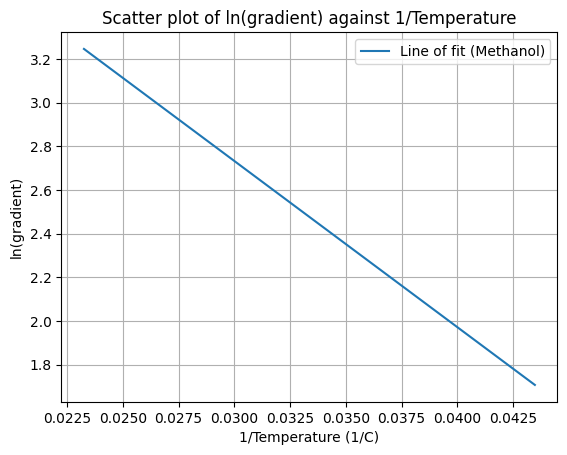

In [57]:
#Gas constant
R=8.314
# Create a new DataFrame for solvents
solvent_df = pd.DataFrame(columns=['Solvent', 'E_act'])
# Assuming you have 'grouped_info' DataFrame with 'gradient' column
grouped_info['inv_temp'] = 1 / grouped_info['Temperature (C)']
grouped_info['ln_gradient'] = np.log(grouped_info['gradient (k)'])

# Plotting
for solvent, data in grouped_info.groupby('Solvent'):
     # Linear regression
    model = LinearRegression()
    model.fit(data[['inv_temp']], data['ln_gradient'])

    # Plotting the line of fit
    plt.plot(data['inv_temp'], model.predict(data[['inv_temp']]), label=f'Line of fit ({solvent})')

    # Calculate the gradient of the line
    line_gradient = model.coef_[0]
    print(f"Gradient for {solvent}: {line_gradient}")

    # Calculate activation energy
    E_act = -R * line_gradient
    print(f"Activation Energy for {solvent}: {E_act}")

    # Append data to the new DataFrame
    solvent_df = solvent_df.append({'Solvent': solvent, 'E_act': E_act}, ignore_index=True)
plt.xlabel('1/Temperature (1/C)')
plt.ylabel('ln(gradient)')
plt.title('Scatter plot of ln(gradient) against 1/Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
print(solvent_df)

    Solvent       E_act
0  Methanol  632.674762
